In [242]:


import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats

In [200]:
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\archive (1).zip
dataset\car_price_prediction.csv


In [133]:
car = pd.read_csv("dataset/car_price_prediction.csv")

In [134]:
# top 5 rows
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [135]:
# number of rows, columns, data types and missing values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [136]:
# numerical data info
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [137]:
car.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


In [138]:
# categorical data
#? Afficher les valeurs uniques pour chaque colonne
car_cat = car.select_dtypes(include='object').columns.to_list()
# for fe in car_cat:
#     print(fe + ": ")
#     print(car[fe].unique())

for col in car_cat:
    print(col)
    print(car[f'{col}'].unique())
    print('*'*75)

Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1357' '13

# Data Cleaning
### Levy

In [139]:
car[car['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [140]:

#? Levy feature should be int type and it has some values '-', which should be nulled
car["Levy"].replace({'-': np.nan}, inplace=True)
car["Levy"] = car["Levy"].astype(float)

In [141]:
car["Levy"].head()

0    1399.0
1    1018.0
2       NaN
3     862.0
4     446.0
Name: Levy, dtype: float64

In [142]:
car[car['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags


In [143]:
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Leather interior

In [144]:

#? Leather interior has been turned "Yes" to 1 and "No" to 0
car["Leather interior"].replace(["Yes", "No"], [1,0], inplace=True)

### Engine volume

In [145]:
car["Engine volume"]

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 19237, dtype: object

In [146]:

#?Engine volume separated with two columns
#?-> one have the turbo true false value
#?-> another have the actual volume with data type float

#? Le but est de retirer le mot turbo et de créer une colonne qui indique
#?->si le volume du moteur inclu un turbo

car["Engine volume"] = car["Engine volume"].str.lower()
car["Turbo"] = car["Engine volume"].str.contains("turbo")
car["Engine volume"] = car["Engine volume"].str.split().str.get(0).astype(float)

In [147]:
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


In [148]:
car['Turbo']

0        False
1        False
2        False
3        False
4        False
         ...  
19232     True
19233    False
19234    False
19235    False
19236    False
Name: Turbo, Length: 19237, dtype: bool

### Mileage

In [149]:
car["Mileage"]

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [150]:

#? removed km and turned data type to int
car["Mileage"] = car["Mileage"].str.split().str.get(0).astype(int)

In [151]:
car["Mileage"]

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int32

### Doors

In [152]:

#? -> replaced "04-May":4, "02-Mar":2, ">5":5 and data type to int
car["Doors"].replace({"04-May":4, "02-Mar":2, ">5":5}, inplace=True)

### ID

In [153]:

#? Dropped
car.drop(labels="ID", axis=1, inplace=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  int64  
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int32  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [154]:
car.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.923700e+04,13418.000000,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,906.838128,2010.912824,0.725373,2.307990,1.532236e+06,4.582991,3.925872,6.582627
std,1.905813e+05,461.867051,5.668673,0.446338,0.877805,4.840387e+07,1.199933,0.403399,4.320168
min,1.000000e+00,87.000000,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,640.000000,2009.000000,0.000000,1.800000,7.013900e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,781.000000,2012.000000,1.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,2.207500e+04,1058.000000,2015.000000,1.000000,2.500000,1.888880e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,1.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


In [155]:
car.describe(include='all')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
count,1.923700e+04,13418.000000,19237,19237,19237.000000,19237,19237.000000,19237,19237.000000,1.923700e+04,19237.000000,19237,19237,19237.000000,19237,19237,19237.000000,19237
unique,NaN,NaN,65,1590,NaN,11,NaN,7,NaN,NaN,NaN,4,3,NaN,2,16,NaN,2
top,NaN,NaN,HYUNDAI,Prius,NaN,Sedan,NaN,Petrol,NaN,NaN,NaN,Automatic,Front,NaN,Left wheel,Black,NaN,False
freq,NaN,NaN,3769,1083,NaN,8736,NaN,10150,NaN,NaN,NaN,13514,12874,NaN,17753,5033,NaN,17306
mean,1.855593e+04,906.838128,NaN,NaN,2010.912824,NaN,0.725373,NaN,2.307990,1.532236e+06,4.582991,NaN,NaN,3.925872,NaN,NaN,6.582627,NaN
std,1.905813e+05,461.867051,NaN,NaN,5.668673,NaN,0.446338,NaN,0.877805,4.840387e+07,1.199933,NaN,NaN,0.403399,NaN,NaN,4.320168,NaN
min,1.000000e+00,87.000000,NaN,NaN,1939.000000,NaN,0.000000,NaN,0.000000,0.000000e+00,1.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN
25%,5.331000e+03,640.000000,NaN,NaN,2009.000000,NaN,0.000000,NaN,1.800000,7.013900e+04,4.000000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN
50%,1.317200e+04,781.000000,NaN,NaN,2012.000000,NaN,1.000000,NaN,2.000000,1.260000e+05,4.000000,NaN,NaN,4.000000,NaN,NaN,6.000000,NaN
75%,2.207500e+04,1058.000000,NaN,NaN,2015.000000,NaN,1.000000,NaN,2.500000,1.888880e+05,4.000000,NaN,NaN,4.000000,NaN,NaN,12.000000,NaN


# Data Visualisation

In [159]:
sns.set()

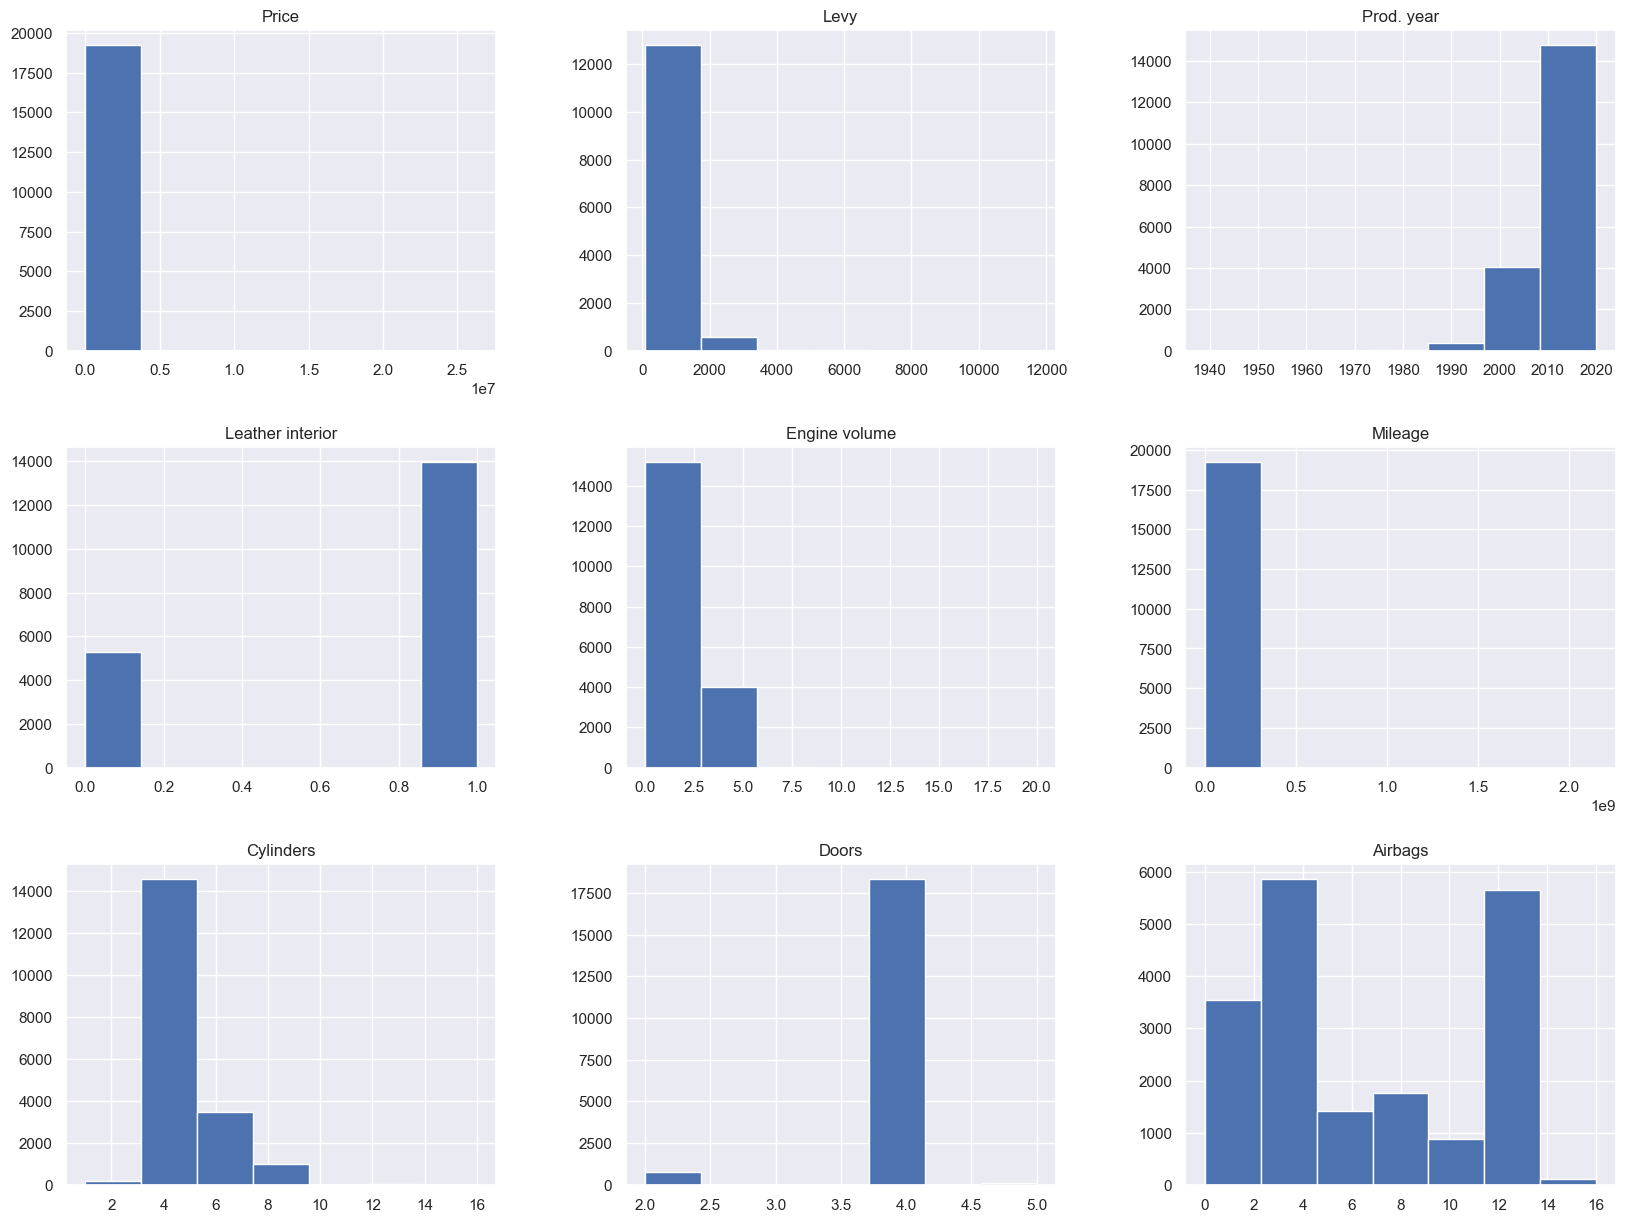

In [161]:
car.hist(bins=7, figsize=(20,15))
plt.show()

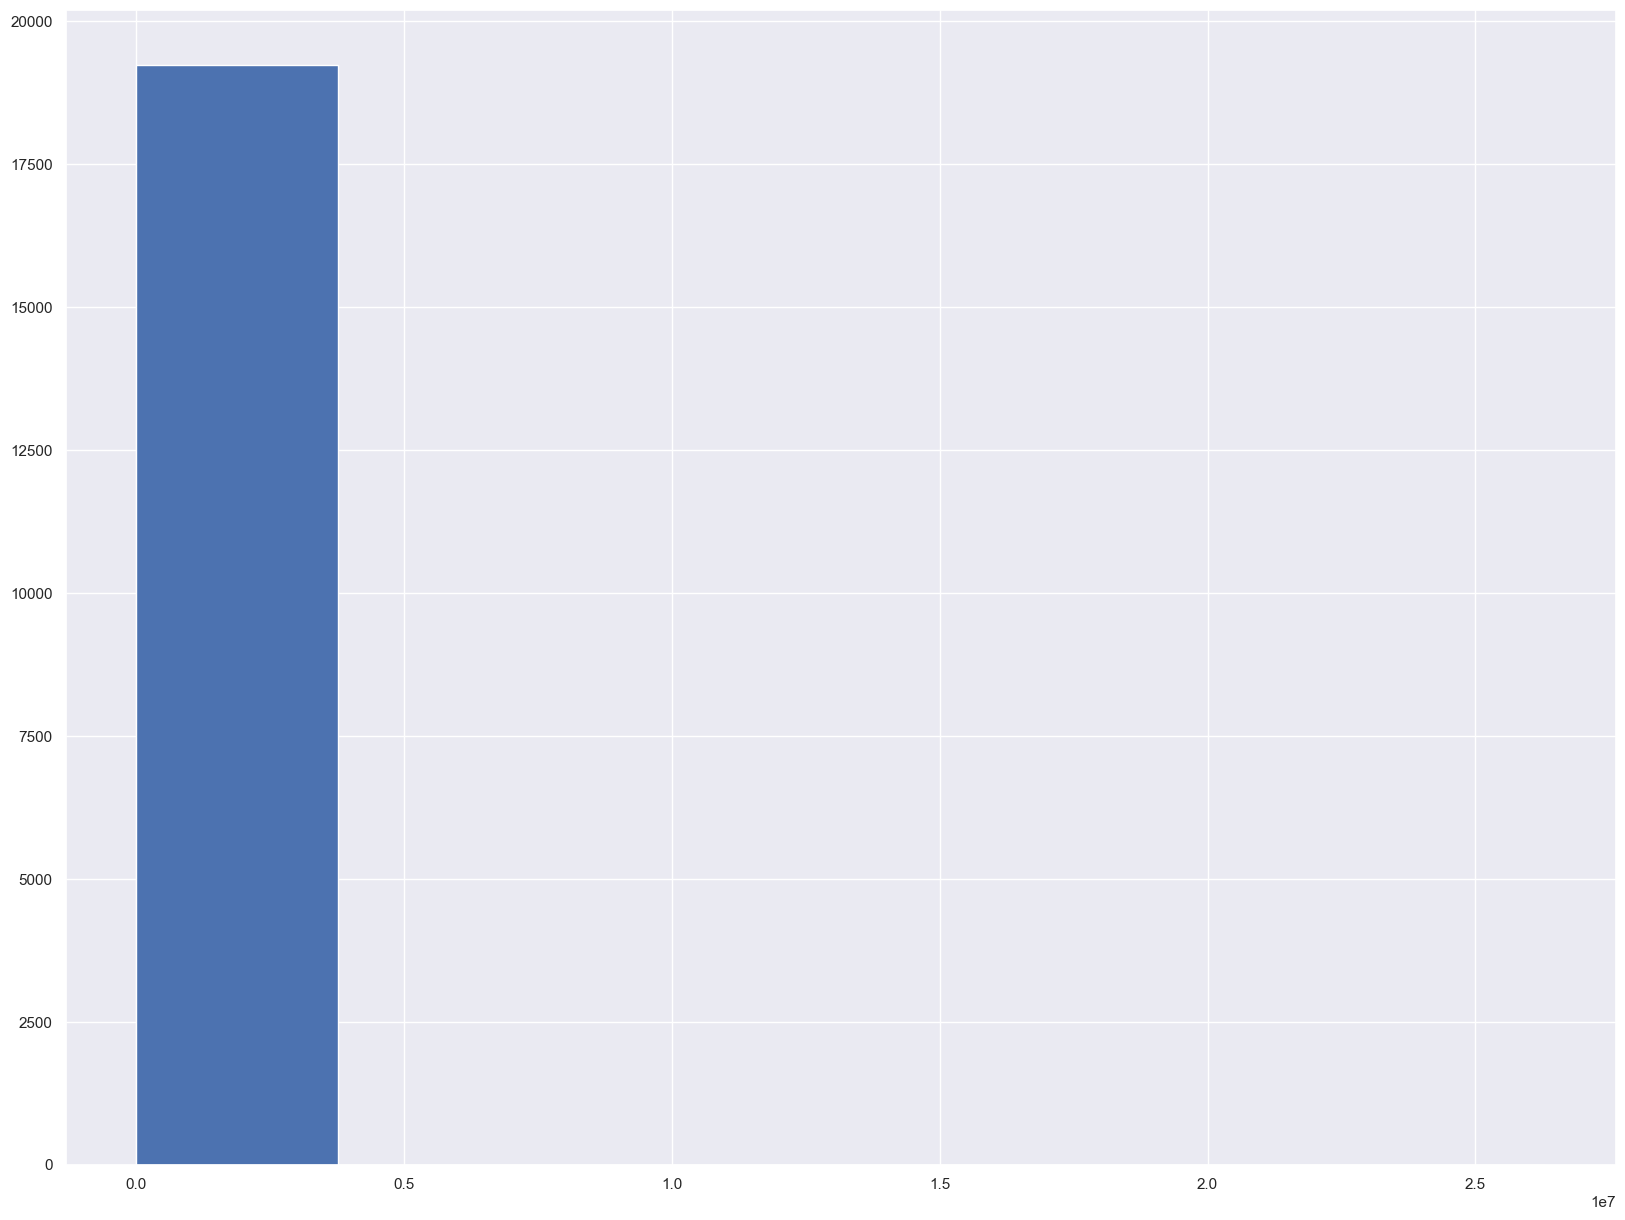

In [165]:
car['Price'].hist(bins=7, figsize=(20,15))
plt.show()

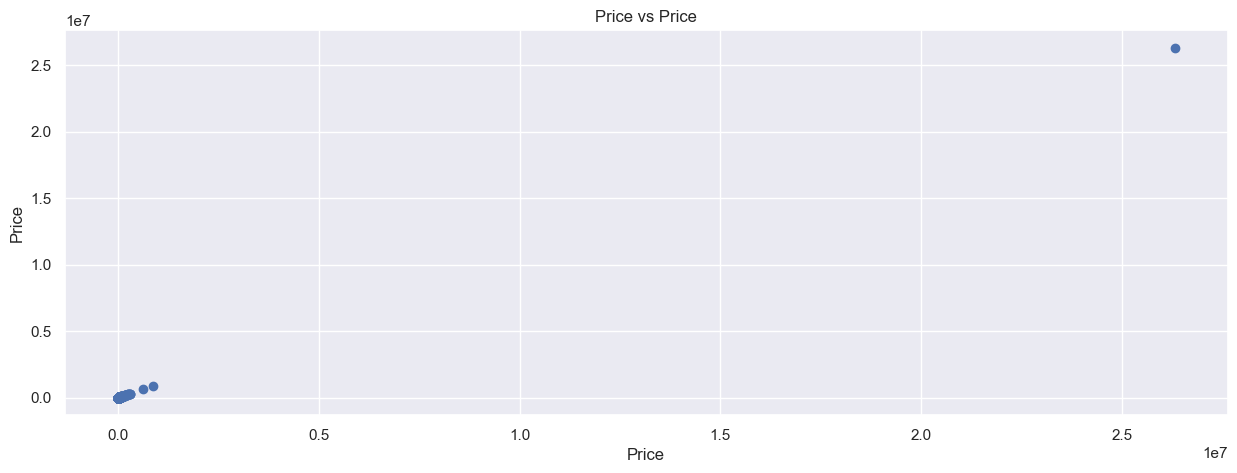

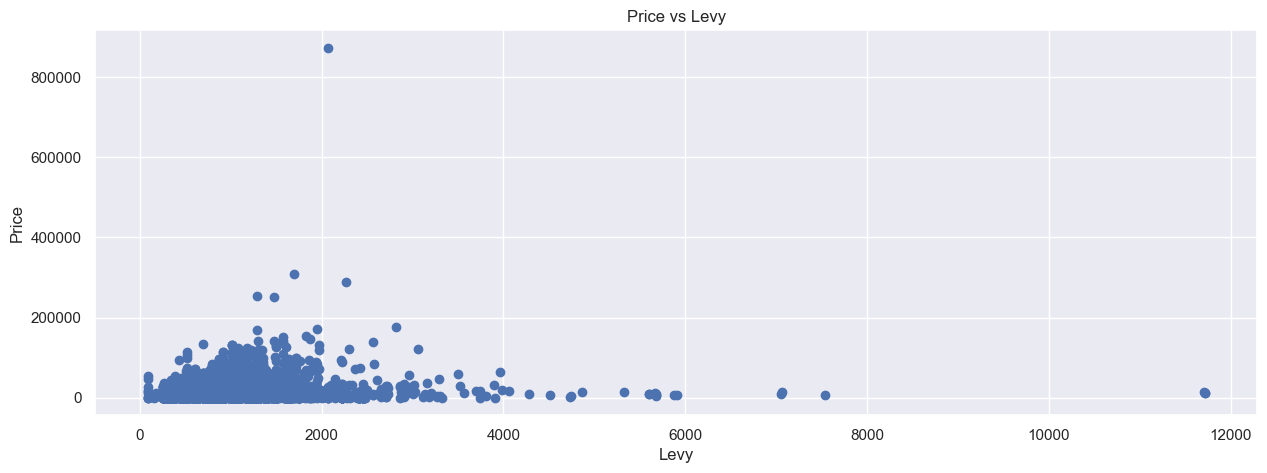

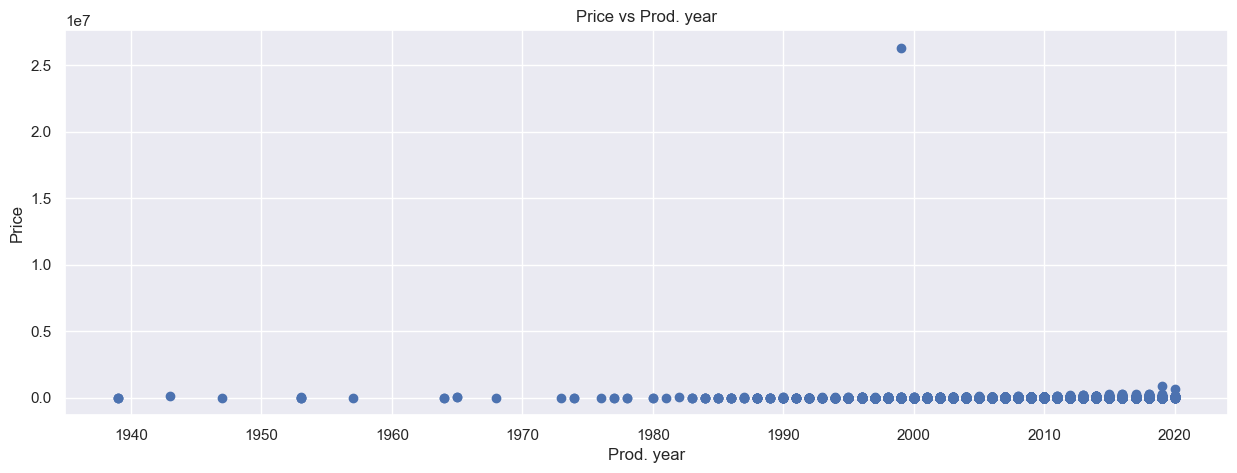

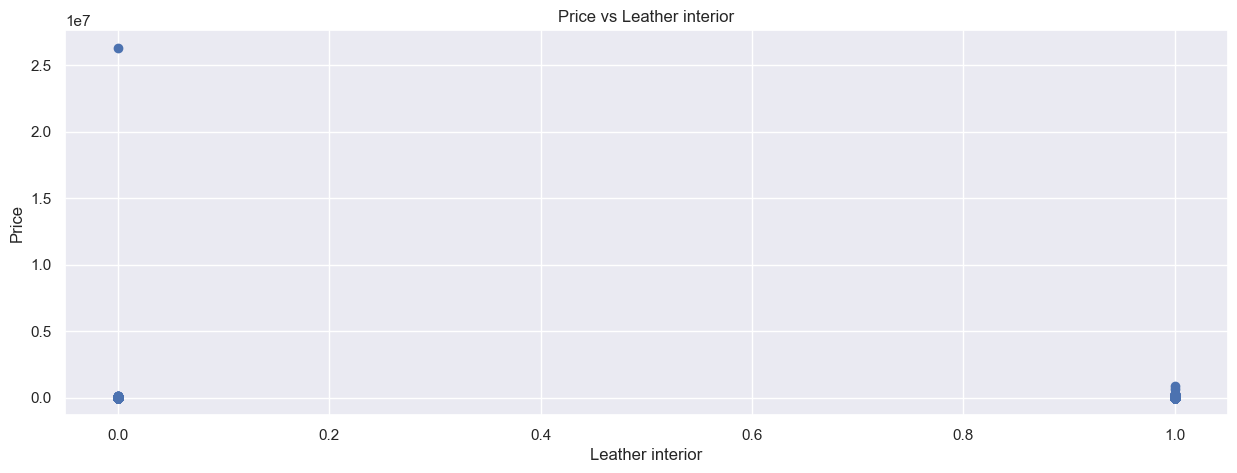

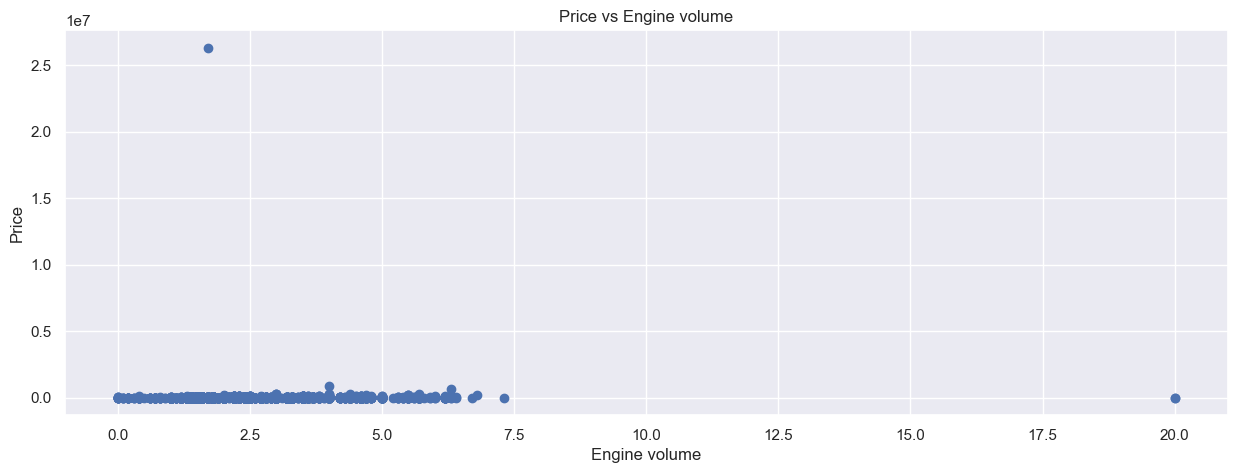

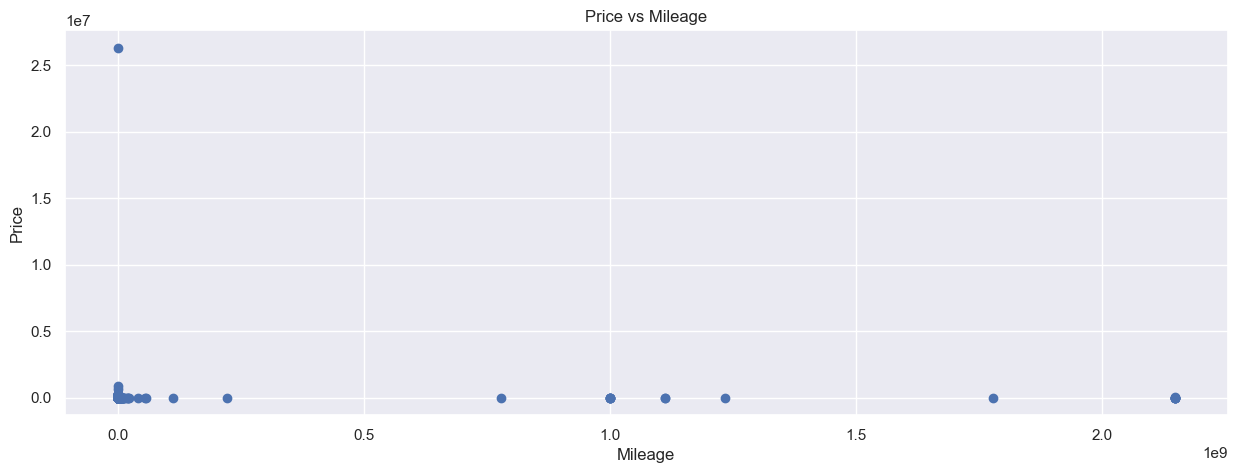

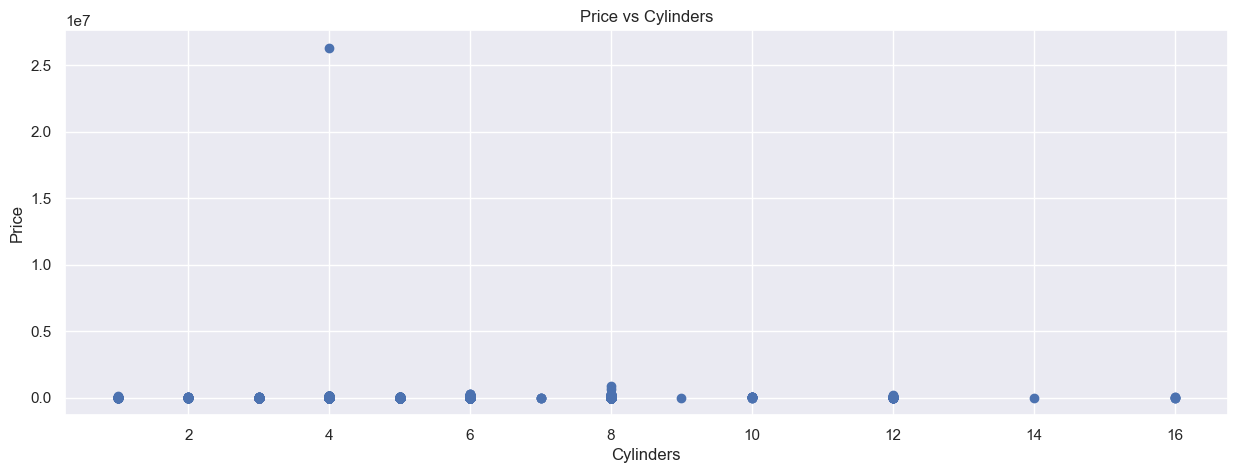

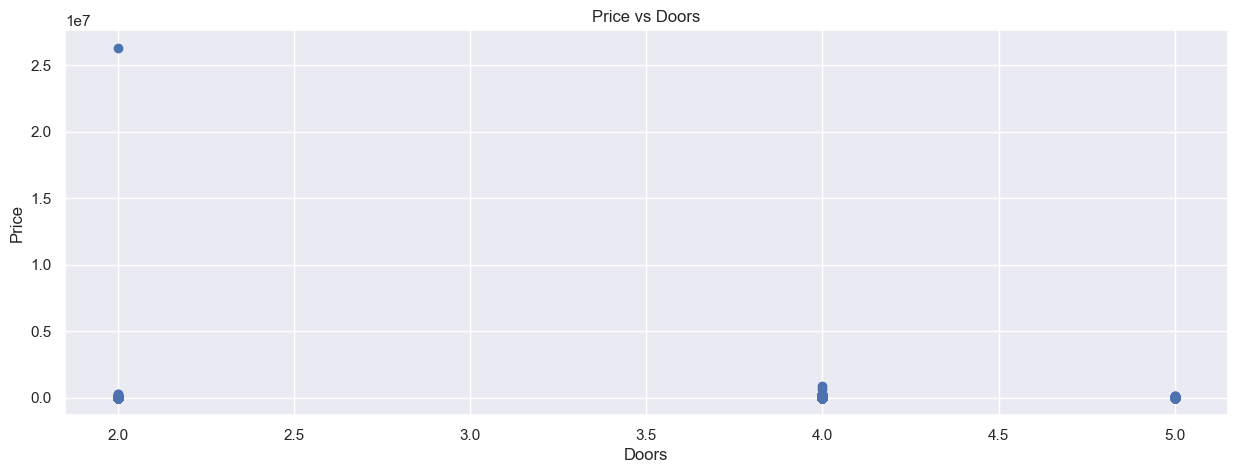

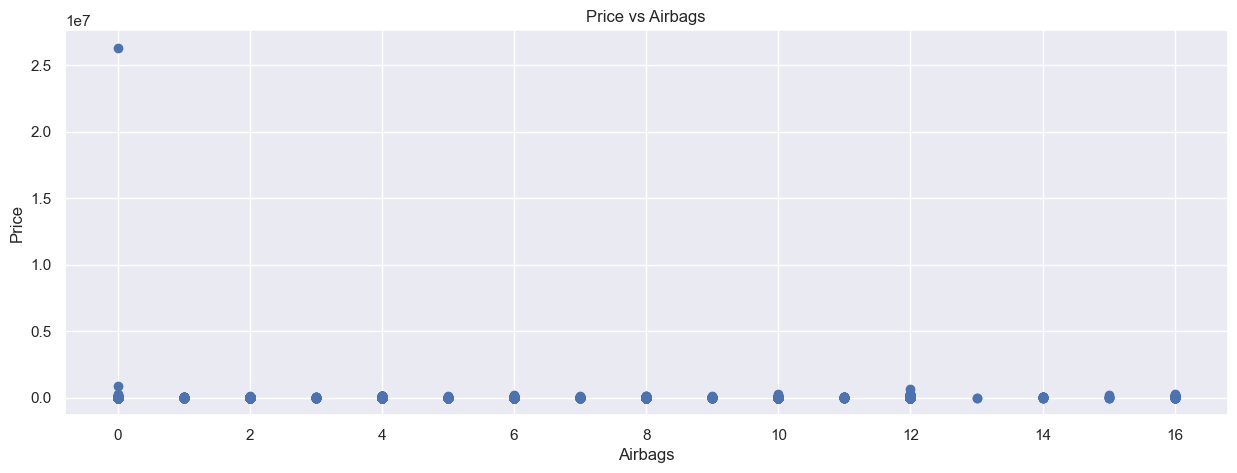

In [164]:
car_num = car.select_dtypes(include="number").columns.to_list()
for col in car_num:
    plt.figure(figsize=(15,5))
    plt.scatter(car[col], car["Price"])
    plt.title("Price vs " + col)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

### Traitement des valeurs abérantes (Price)

In [166]:
display(car[car.Price == car.Price.max()])
display(car[car.Price > 20000000])
display(car[car.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,1,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,1,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,1,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,1,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,NaN,NISSAN,Note,2006,Hatchback,0,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,1,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,0,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,1,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [181]:
car_m1 = car.drop(car[car['Price'] > 20000000].index)

In [182]:
car_m1

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,True
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,False
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,False
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,False


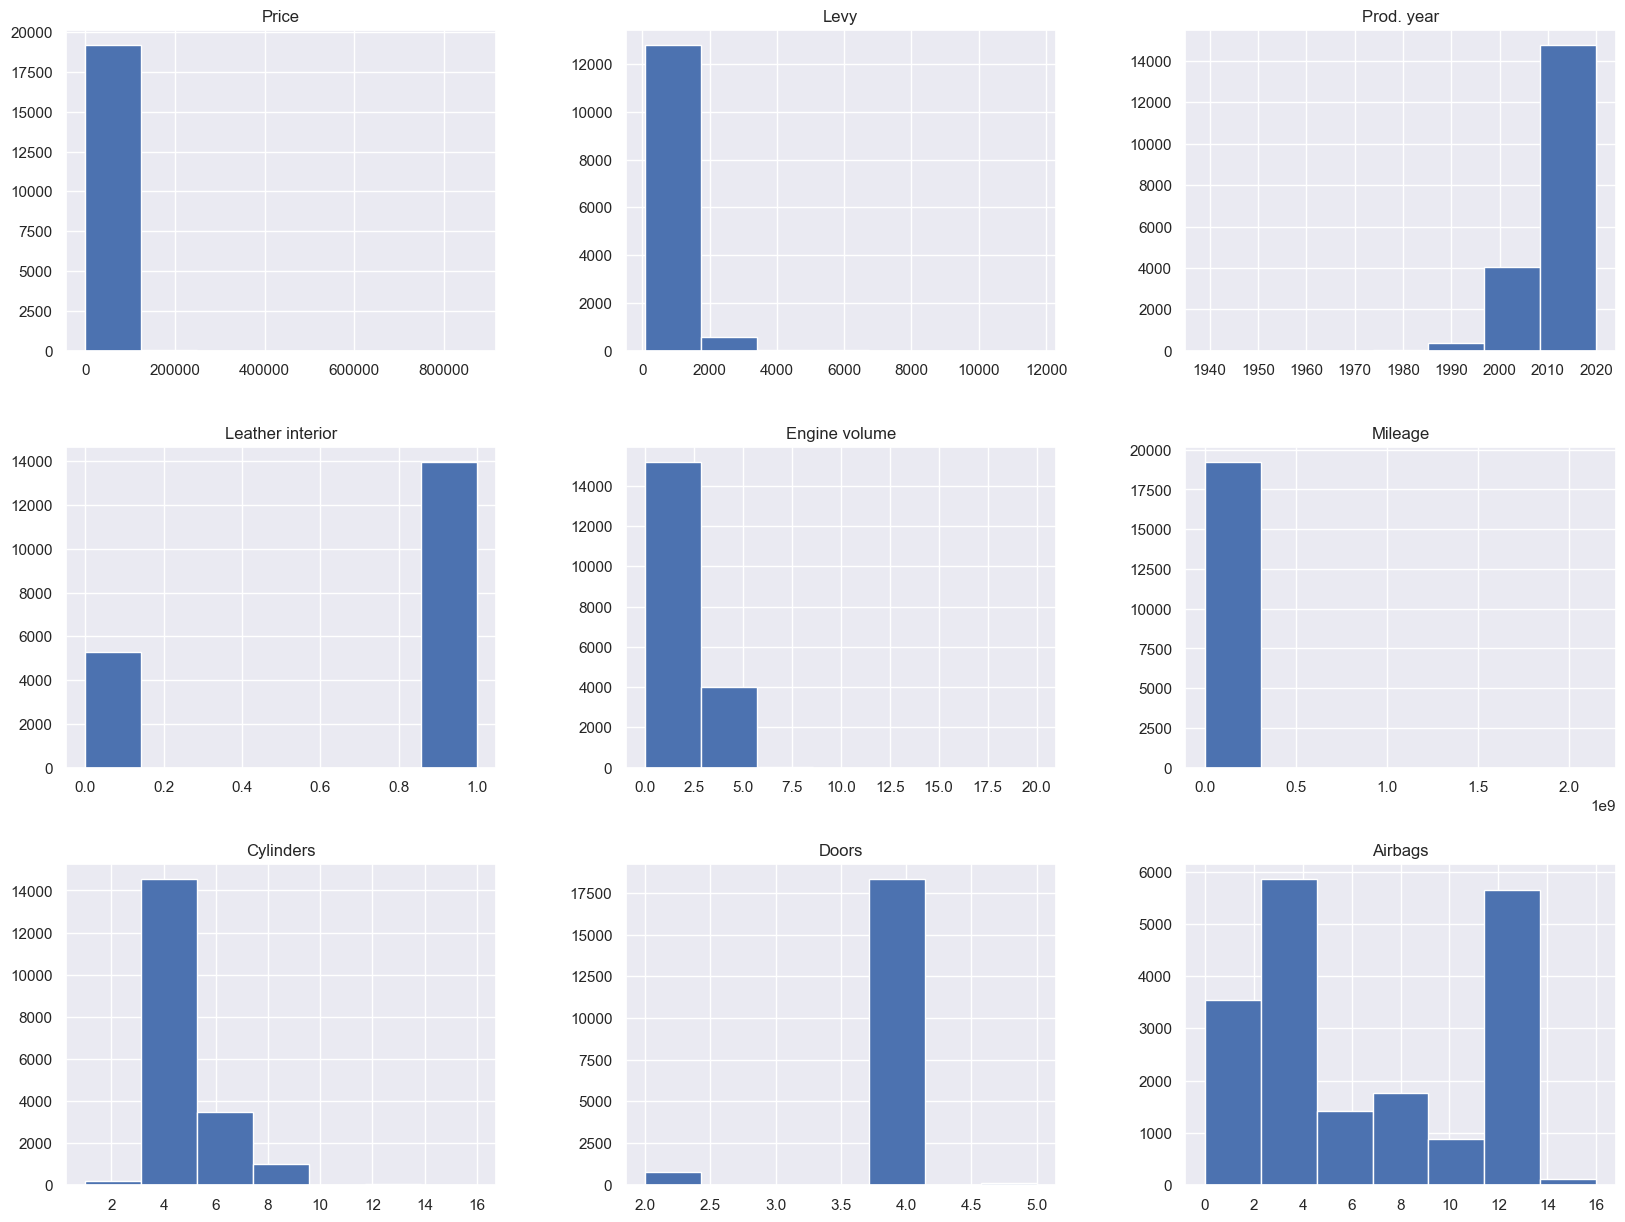

In [183]:
car_m1.hist(bins=7, figsize=(20,15))
plt.show()

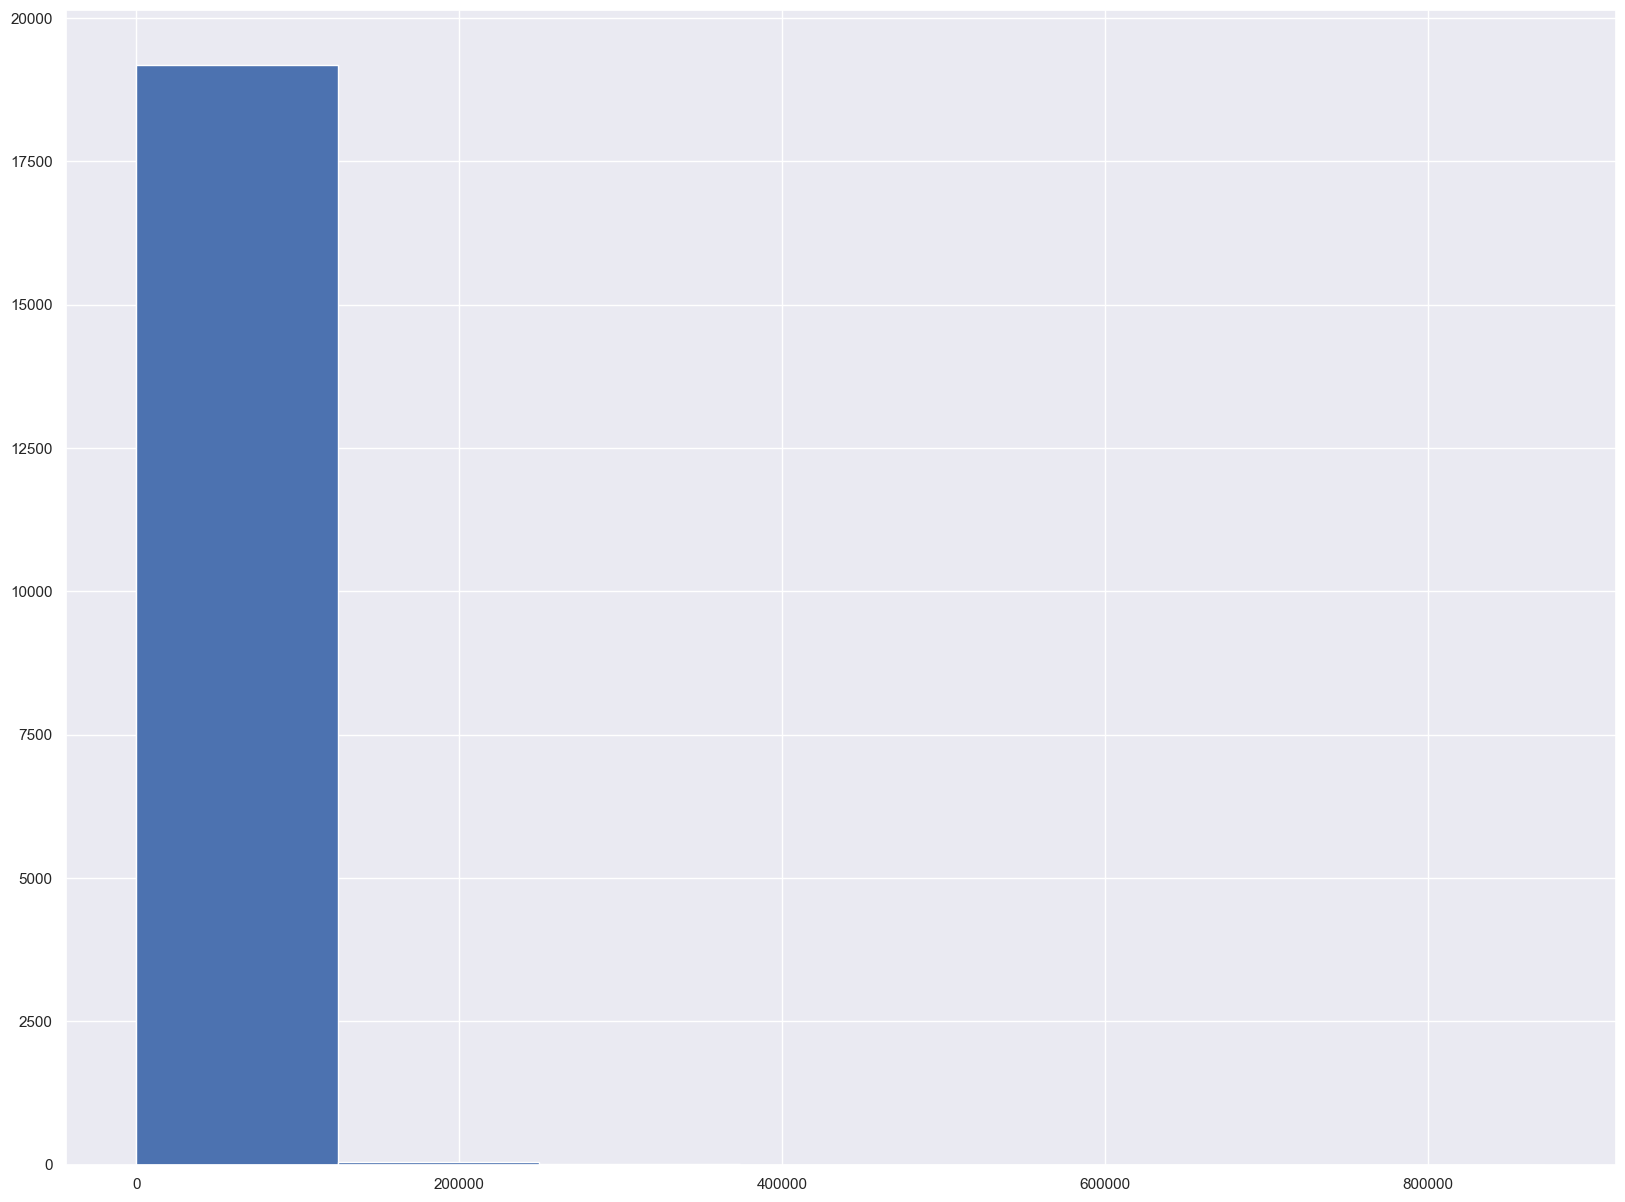

In [184]:
car_m1['Price'].hist(bins=7, figsize=(20,15))
plt.show()

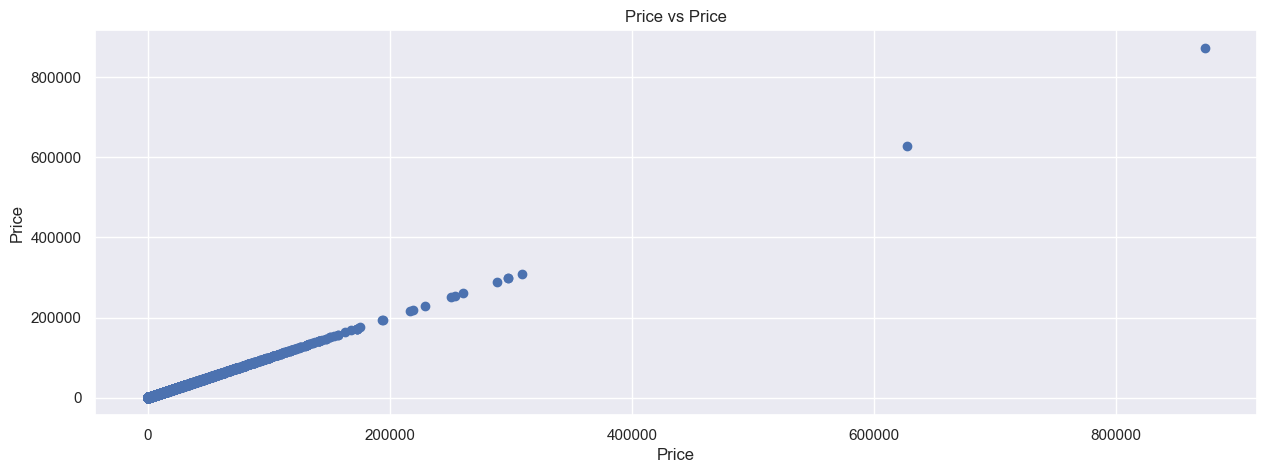

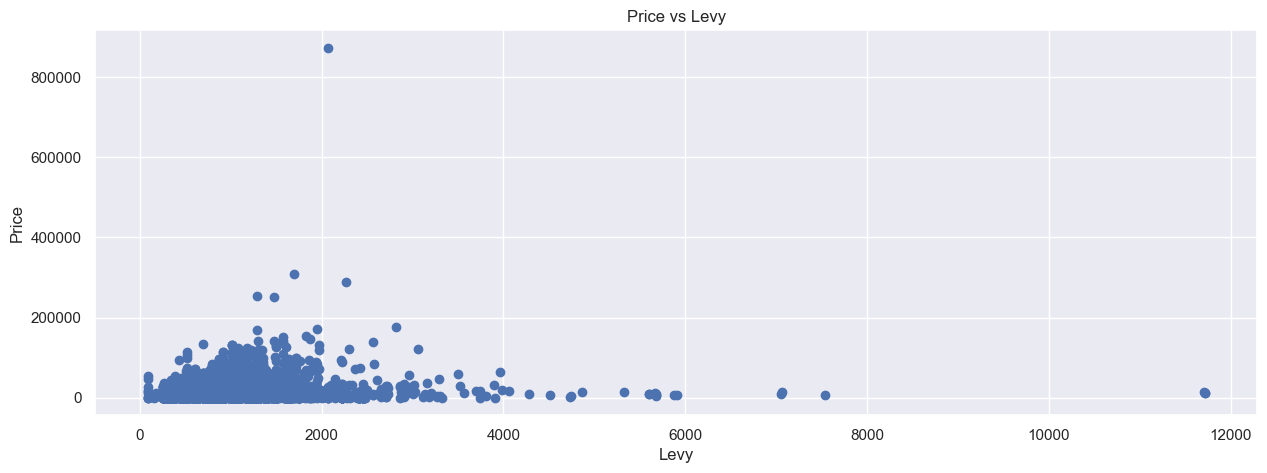

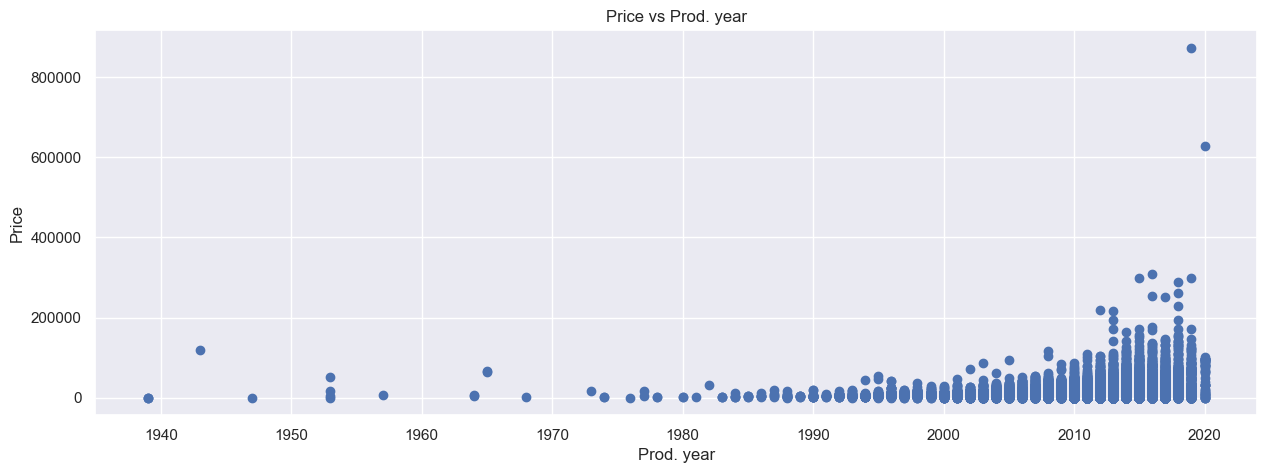

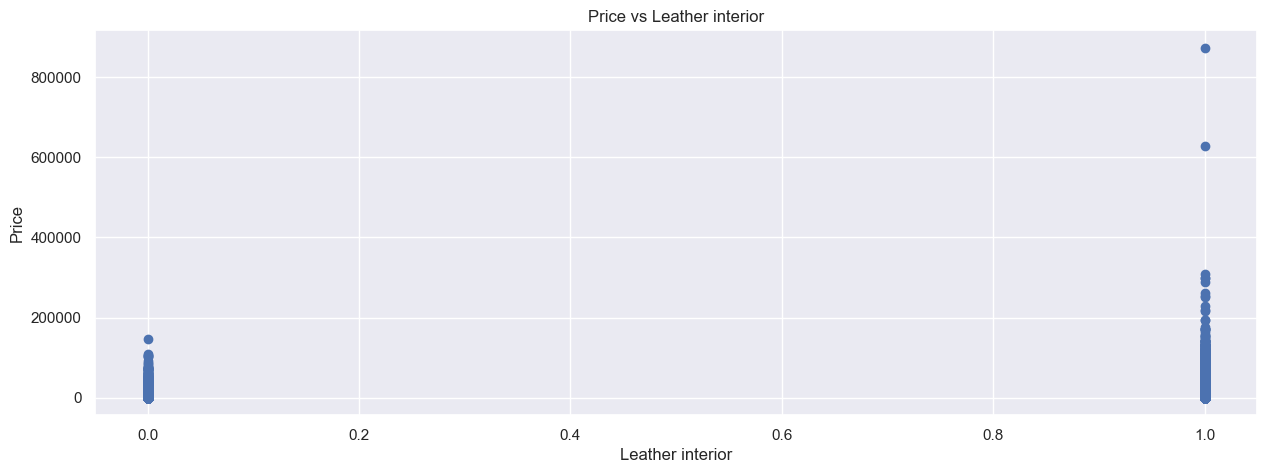

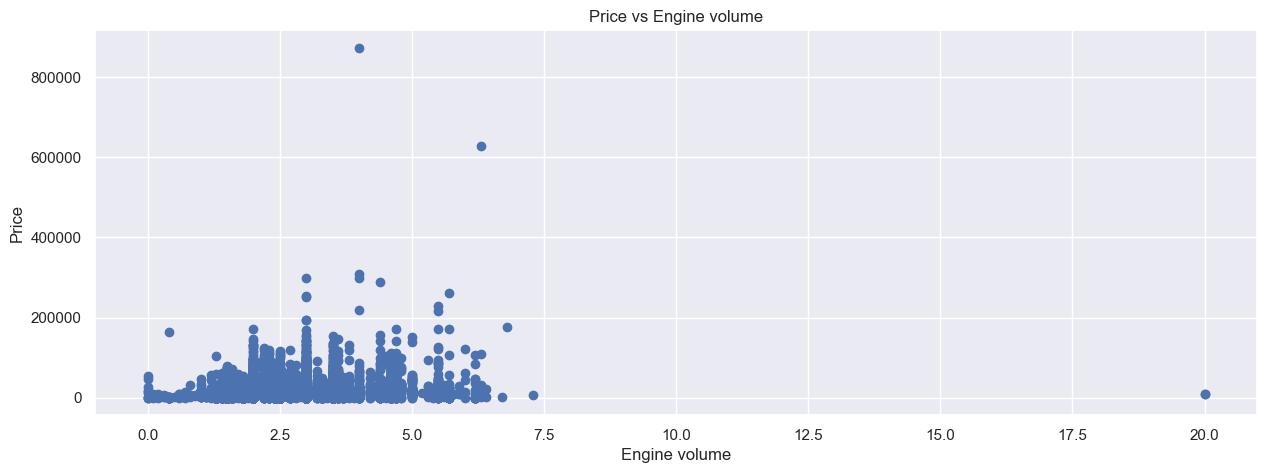

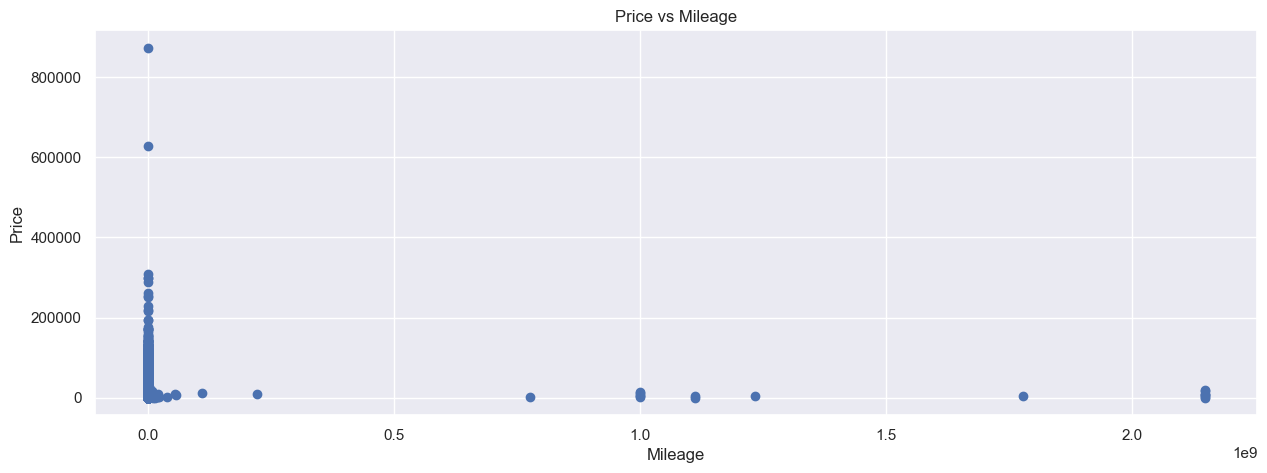

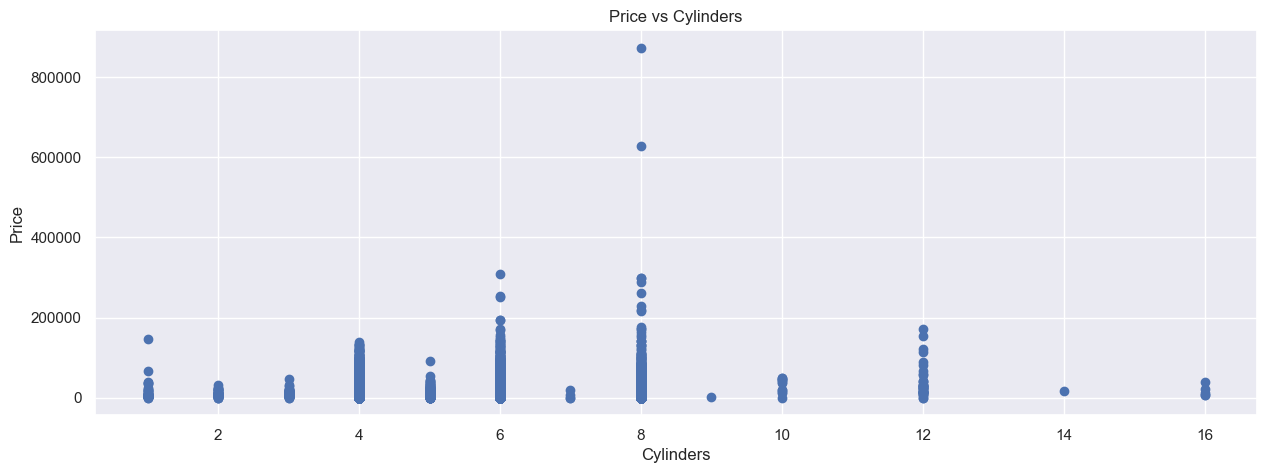

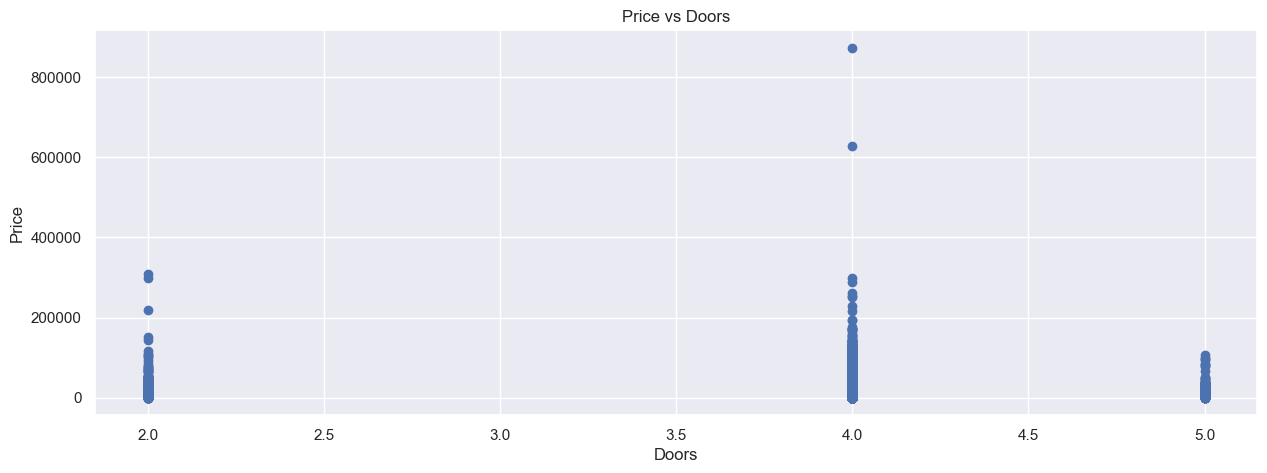

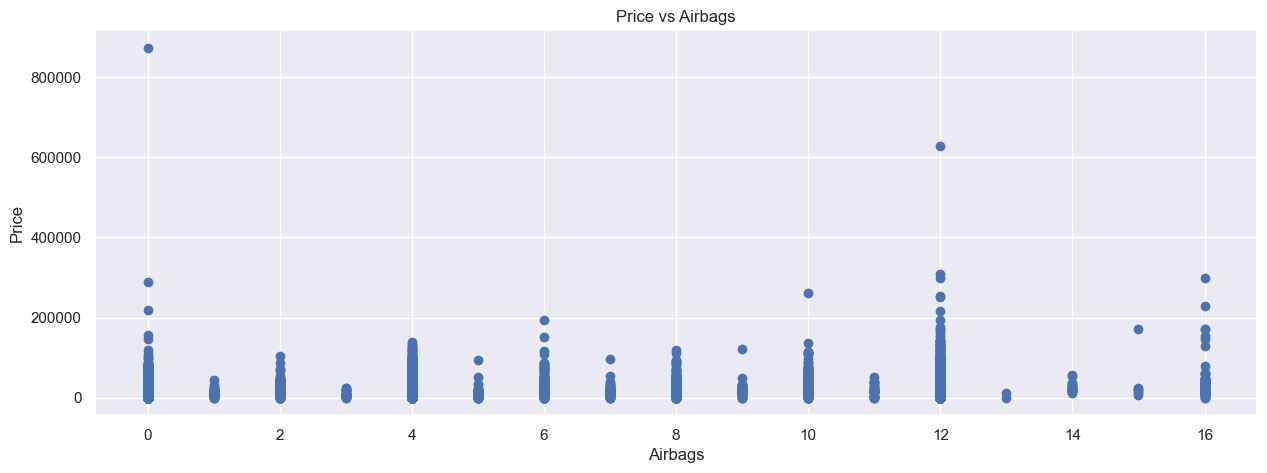

In [185]:
car_num = car_m1.select_dtypes(include="number").columns.to_list()
for col in car_num:
    plt.figure(figsize=(15,5))
    plt.scatter(car_m1[col], car_m1["Price"])
    plt.title("Price vs " + col)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

In [186]:
car_m1.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags
count,19236.000000,13418.000000,19236.000000,19236.000000,19236.000000,1.923600e+04,19236.000000,19236.000000,19236.000000
mean,17189.273862,906.838128,2010.913444,0.725411,2.308021,1.532310e+06,4.583021,3.925972,6.582969
std,19786.337788,461.867051,5.668170,0.446319,0.877816,4.840513e+07,1.199957,0.403171,4.320020
min,1.000000,87.000000,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5331.000000,640.000000,2009.000000,0.000000,1.800000,7.012875e+04,4.000000,4.000000,4.000000
50%,13172.000000,781.000000,2012.000000,1.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,22066.000000,1058.000000,2015.000000,1.000000,2.500000,1.889160e+05,4.000000,4.000000,12.000000
max,872946.000000,11714.000000,2020.000000,1.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


## Removing outliers (IQR method)

https://www.bing.com/videos/search?q=iqr&docid=603486718077774623&mid=CD2E7219ECDDAAEC2D99CD2E7219ECDDAAEC2D99&view=detail&FORM=VIRE

Utiliser la méthode IQR permet de retirer tout ce qui se trouve avant le premier quartile et le troisième quartile. Cela ne devrait pas affecter les résultats du modèle final, si ce ne serait de l'améliorer en retirant les valeurs abérantes

In [187]:
def detect_outliers(df, features, thold):
    outlier_indices = []
    
    for fe in features:
        # 1st quartile or 25%
        q1 = np.percentile(df[fe], 25)
        # 3rd quartile or 75%
        q3 = np.percentile(df[fe], 75)
        # IQR formula
        IQR = q3 - q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indices
        outlier_list = df[(df[fe] < q1 - outlier_step) | (df[fe] > q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list)
    
    return outlier_indices

In [188]:
features = ["Price", "Levy", "Mileage"]
outliers = detect_outliers(car, features, 1.5)
car_prep = car.drop(car.loc[outliers].index, axis=0)

In [189]:
car_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17527 non-null  int64  
 1   Levy              12141 non-null  float64
 2   Manufacturer      17527 non-null  object 
 3   Model             17527 non-null  object 
 4   Prod. year        17527 non-null  int64  
 5   Category          17527 non-null  object 
 6   Leather interior  17527 non-null  int64  
 7   Fuel type         17527 non-null  object 
 8   Engine volume     17527 non-null  float64
 9   Mileage           17527 non-null  int32  
 10  Cylinders         17527 non-null  float64
 11  Gear box type     17527 non-null  object 
 12  Drive wheels      17527 non-null  object 
 13  Doors             17527 non-null  int64  
 14  Wheel             17527 non-null  object 
 15  Color             17527 non-null  object 
 16  Airbags           17527 non-null  int64  
 17

In [190]:
car_prep.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags
count,17527.000000,12141.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000
mean,14221.861471,895.891772,2010.679466,0.709477,2.280076,132393.381240,4.554687,3.923946,6.601016
std,11465.846272,467.732762,5.579032,0.454017,0.863971,81348.780496,1.163152,0.407032,4.329392
min,1.000000,87.000000,1939.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
25%,4861.000000,639.000000,2009.000000,0.000000,1.700000,71856.000000,4.000000,4.000000,4.000000
50%,12544.000000,779.000000,2012.000000,1.000000,2.000000,126265.000000,4.000000,4.000000,6.000000
75%,20385.000000,1055.000000,2014.000000,1.000000,2.500000,183729.500000,4.000000,4.000000,12.000000
max,47120.000000,11714.000000,2020.000000,1.000000,20.000000,367000.000000,16.000000,5.000000,16.000000


### Visualisation après IQR

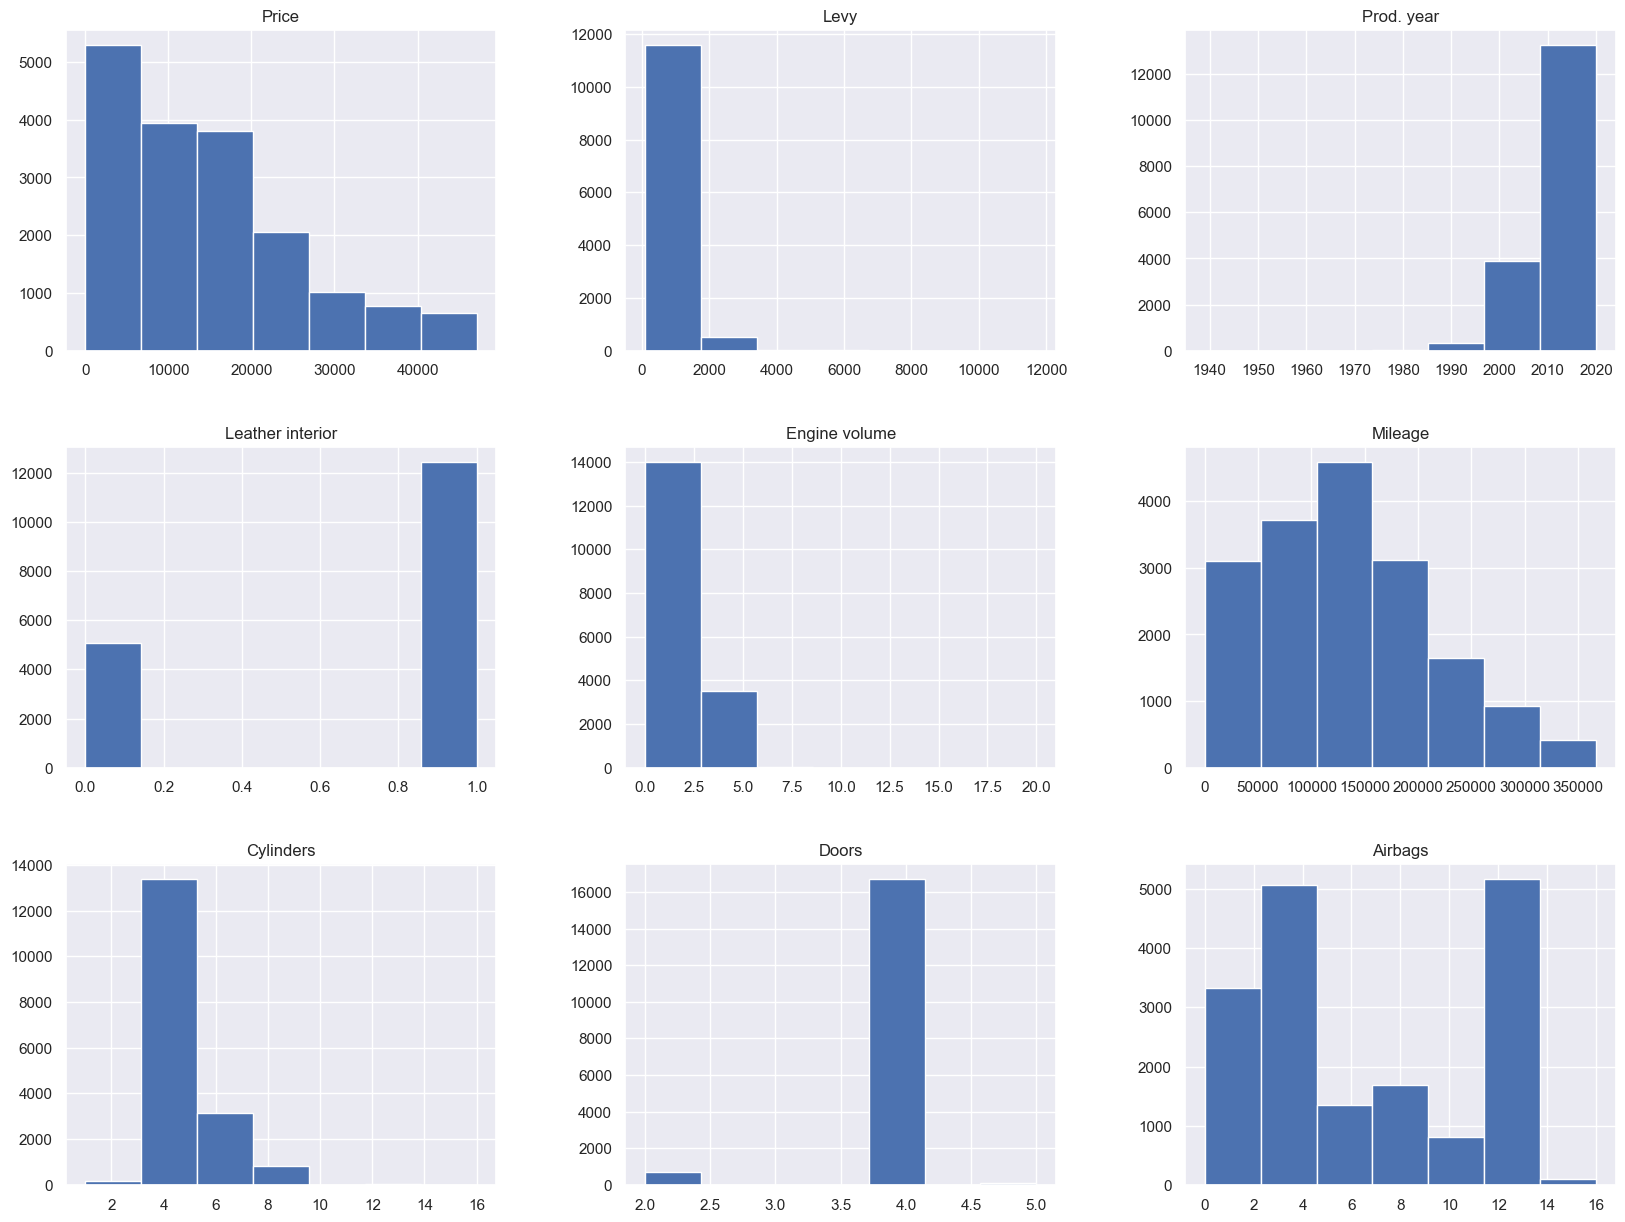

In [191]:
car_prep.hist(bins=7, figsize=(20,15))
plt.show()

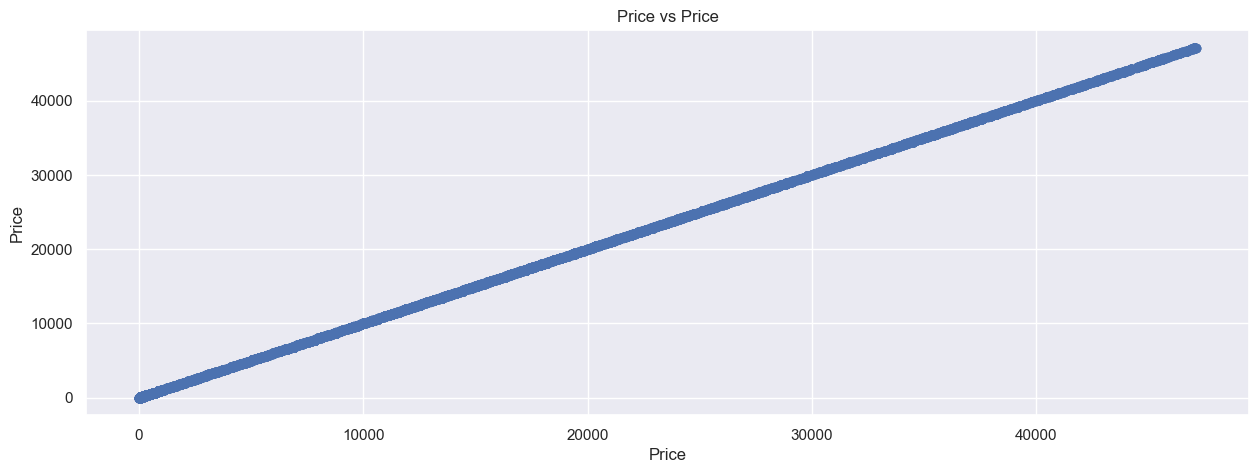

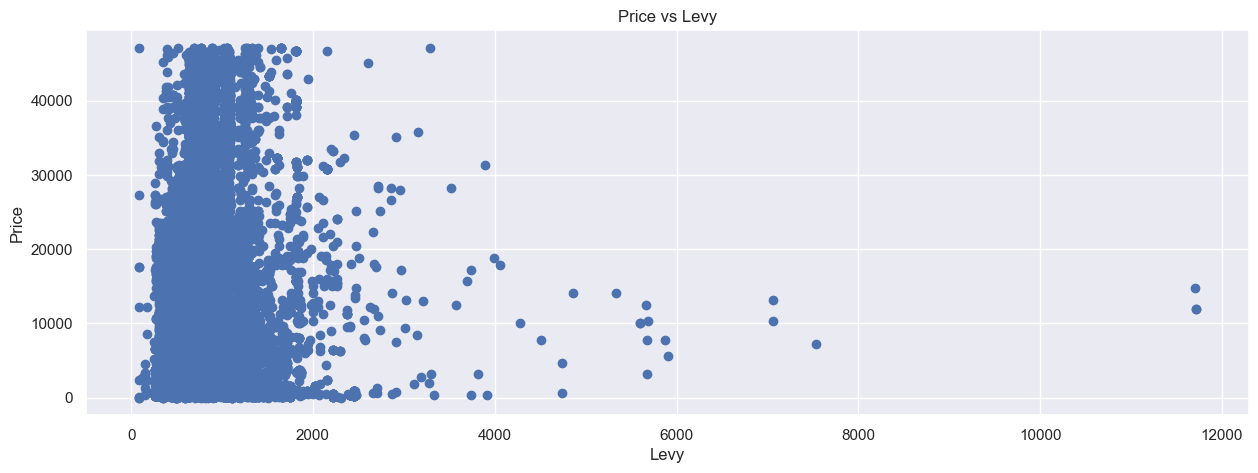

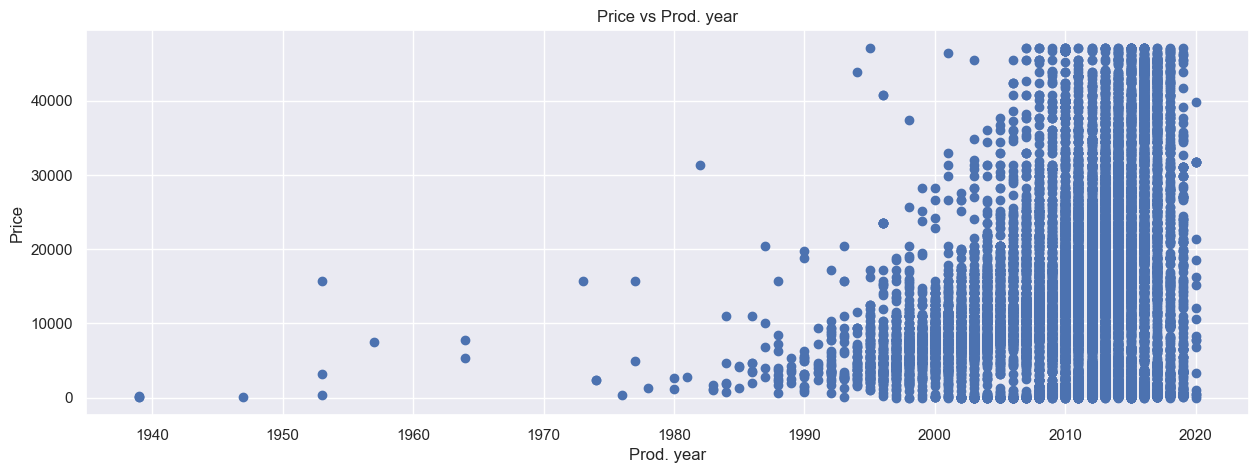

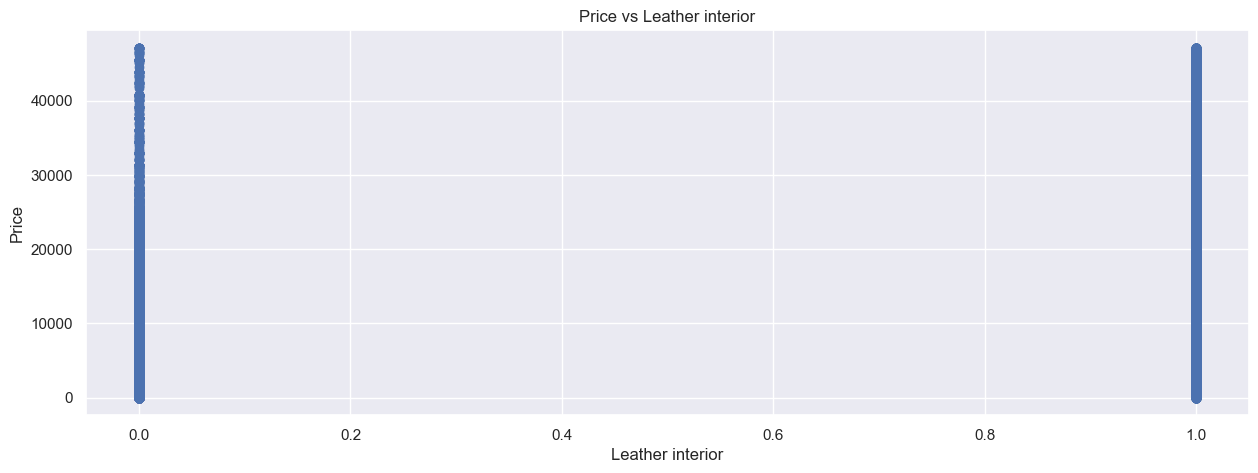

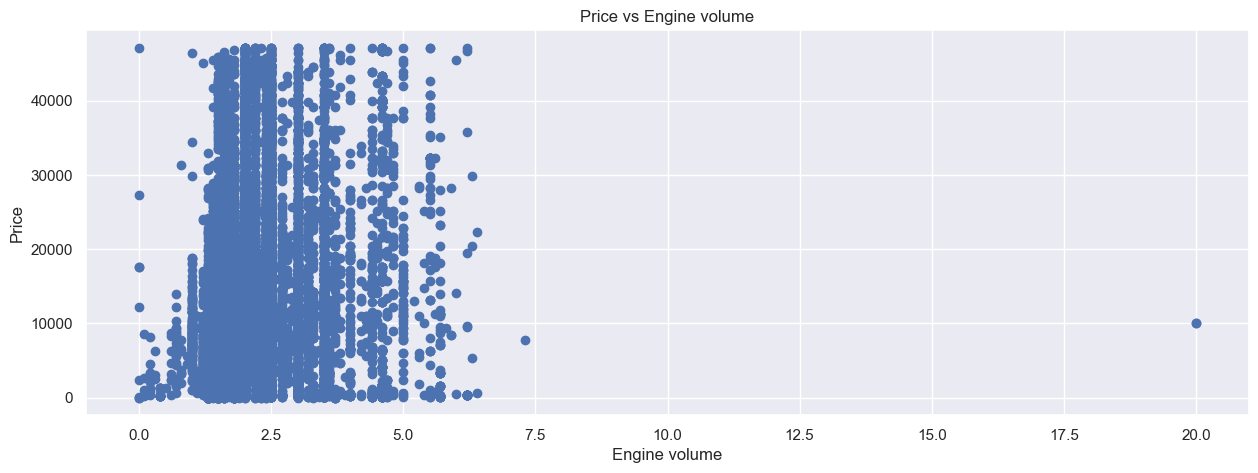

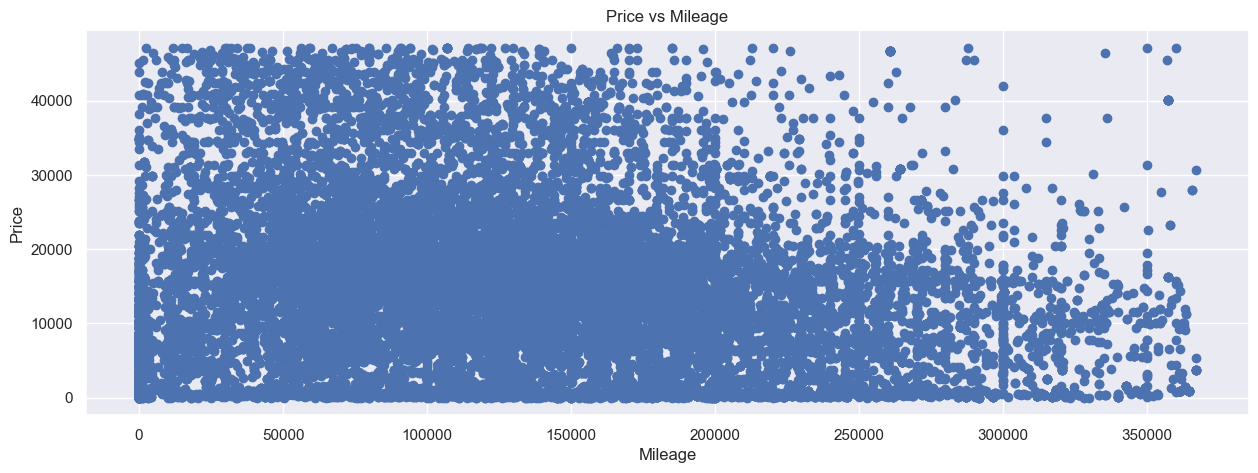

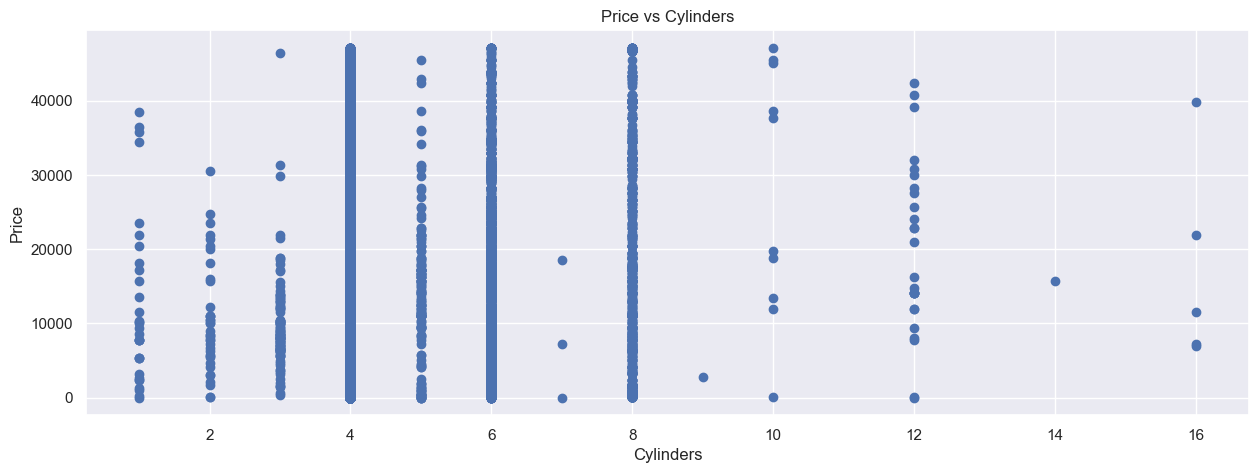

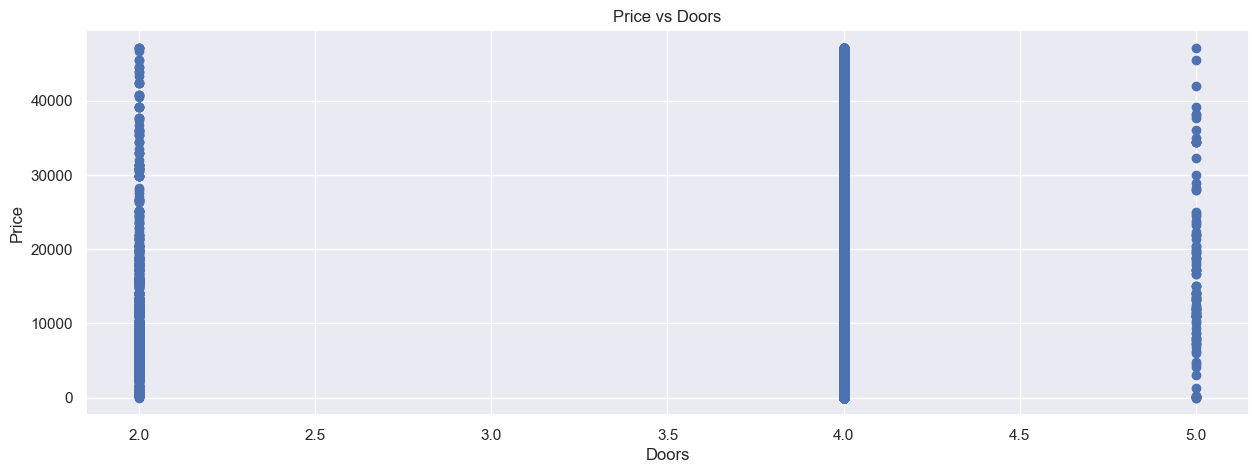

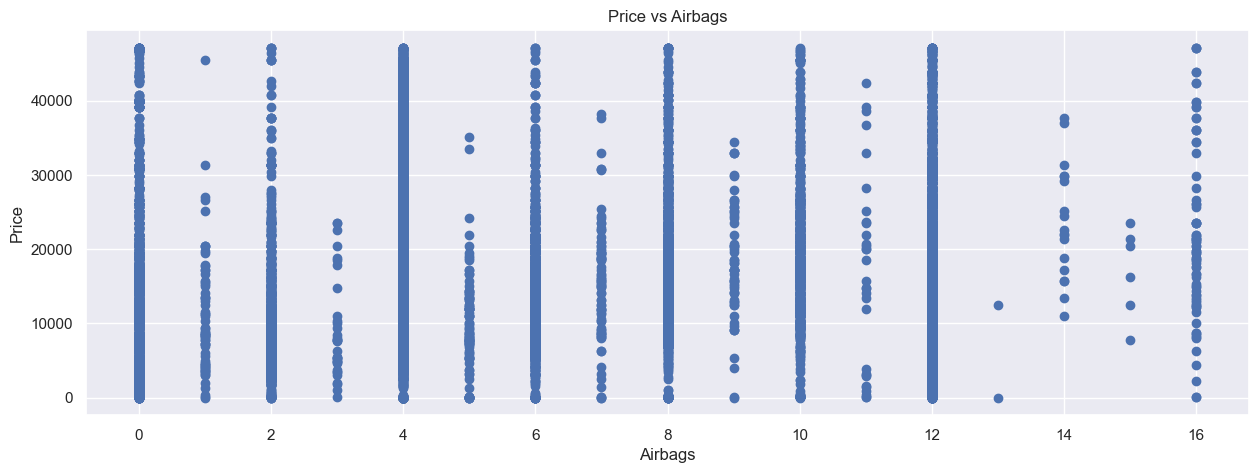

In [192]:
car_num = car_prep.select_dtypes(include="number").columns.to_list()
for col in car_num:
    plt.figure(figsize=(15,5))
    plt.scatter(car_prep[col], car_prep["Price"])
    plt.title("Price vs " + col)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

### Données cathégoriques

In [193]:
car_cat = car_prep.select_dtypes(include="object").columns.to_list()
car_cat

['Manufacturer',
 'Model',
 'Category',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

### Top values for categorical data

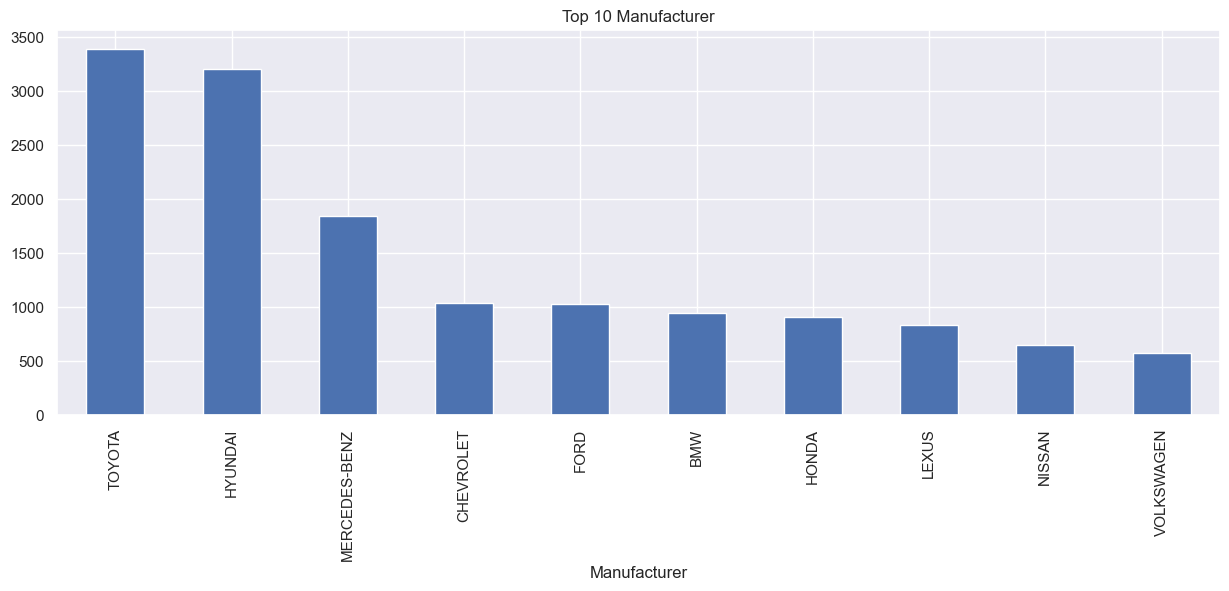

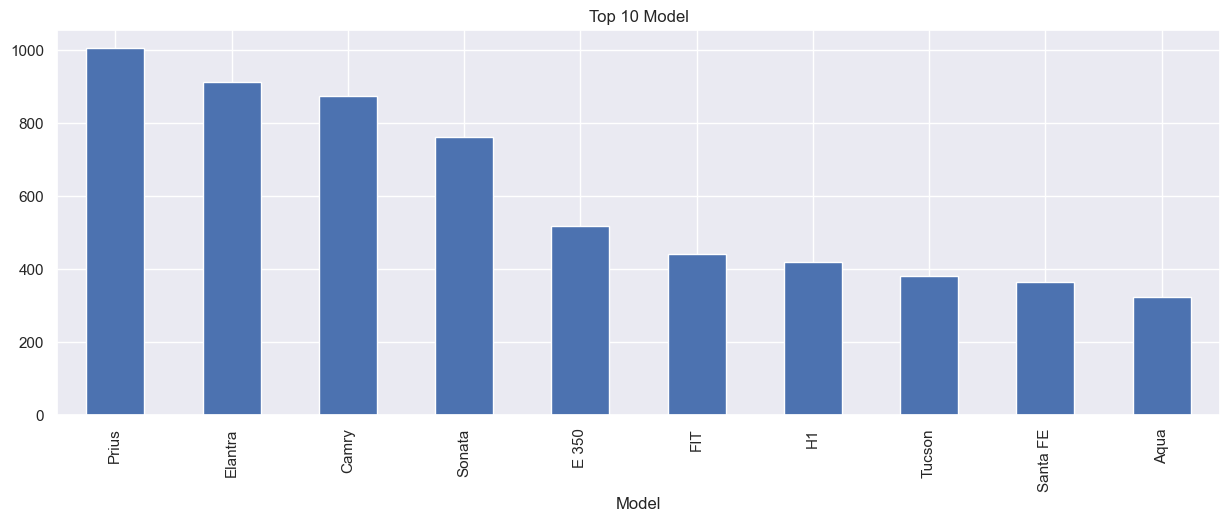

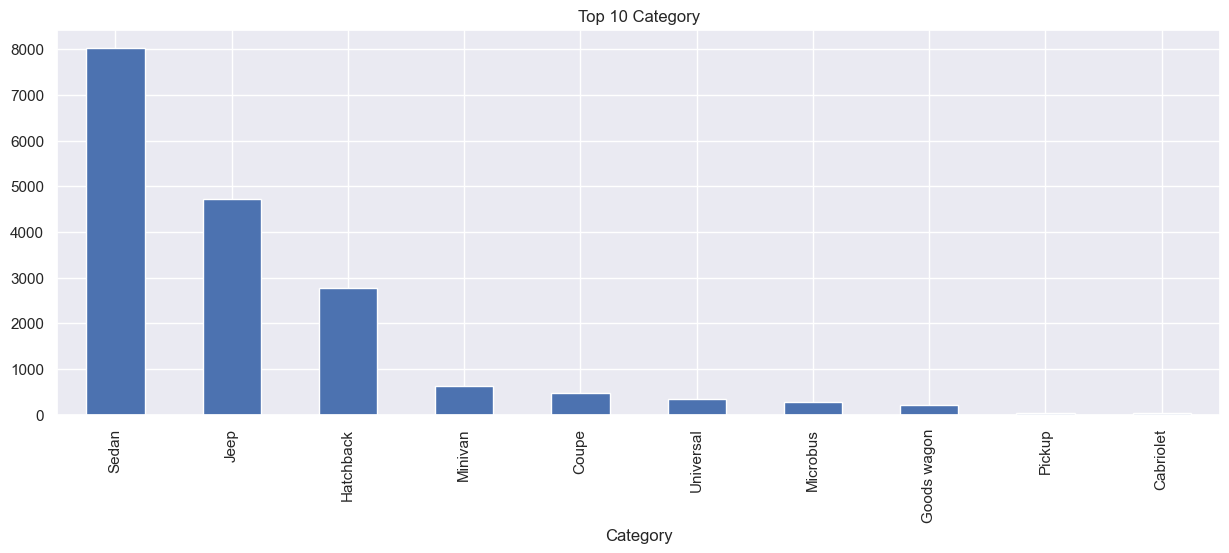

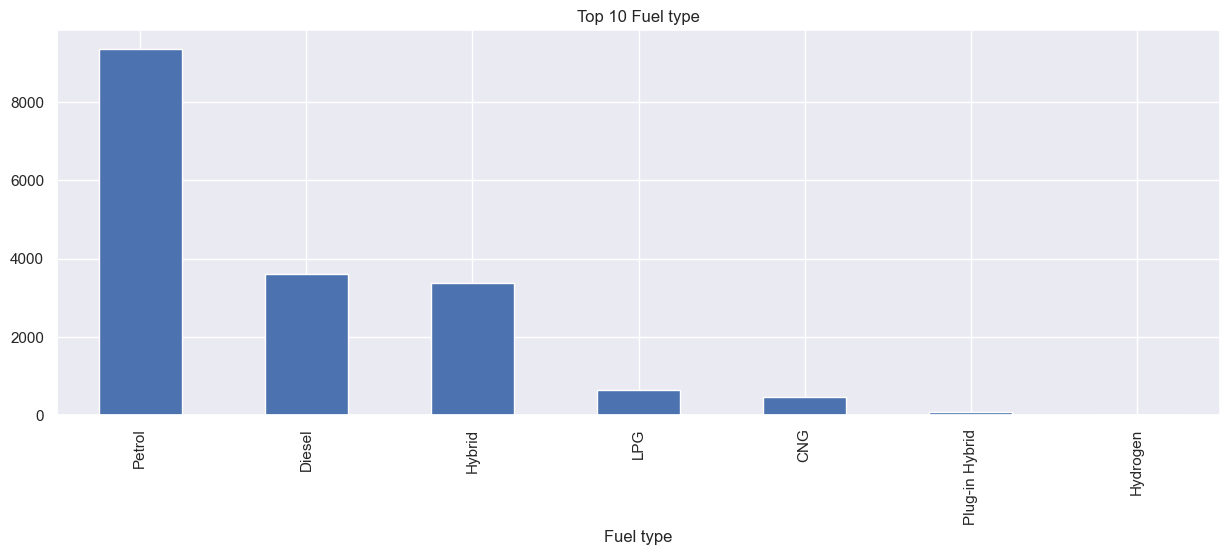

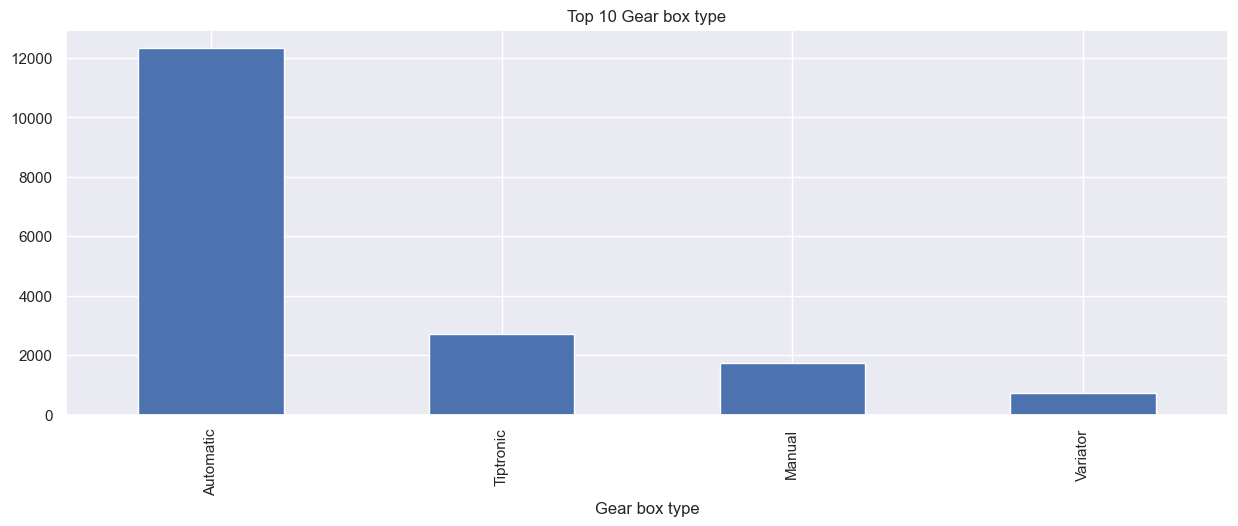

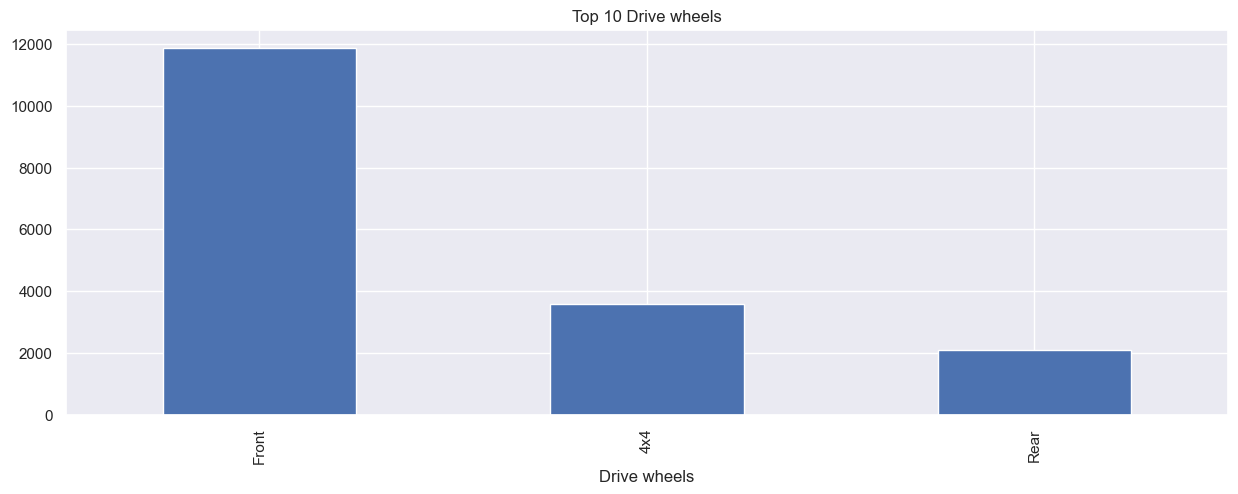

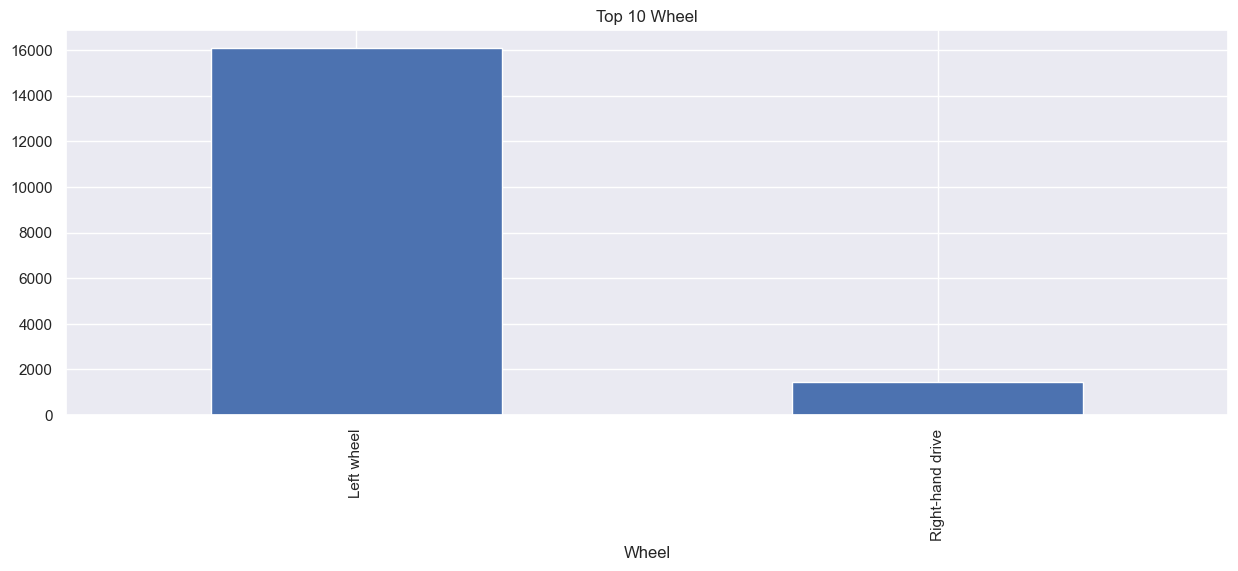

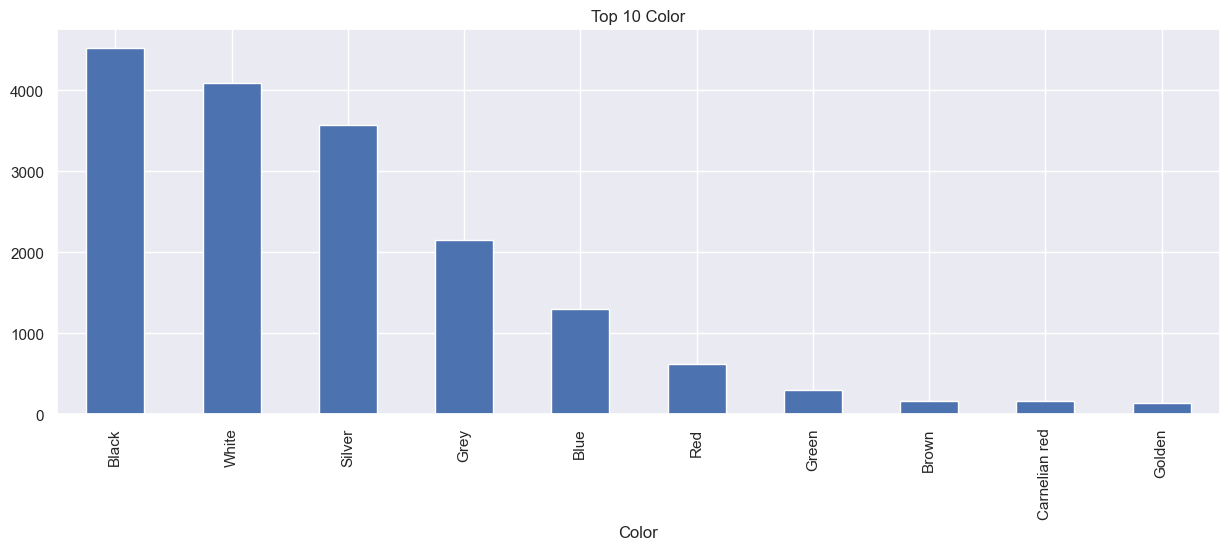

In [194]:
for col in car_cat: 
    plt.figure(figsize=(15,5))
    top10 = car_prep[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title("Top 10 " + col)
    plt.show()

### Top values for numerical data

In [195]:

#? "Engine volume" and "Levy" features are omitted in representation
print(car_num)
attr = ['Price','Prod. year','Leather interior','Mileage','Cylinders','Doors','Airbags']

['Price', 'Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']


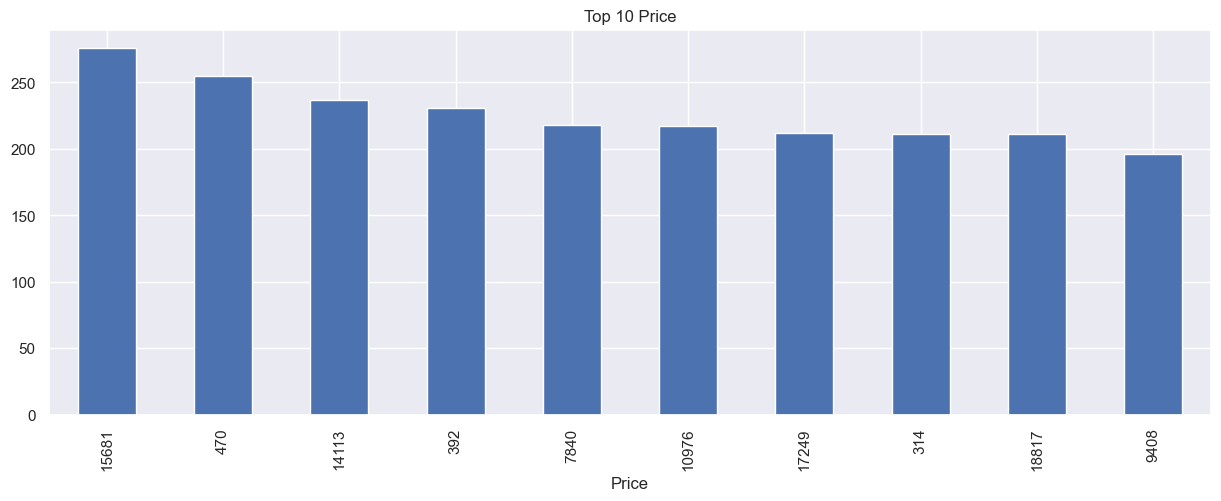

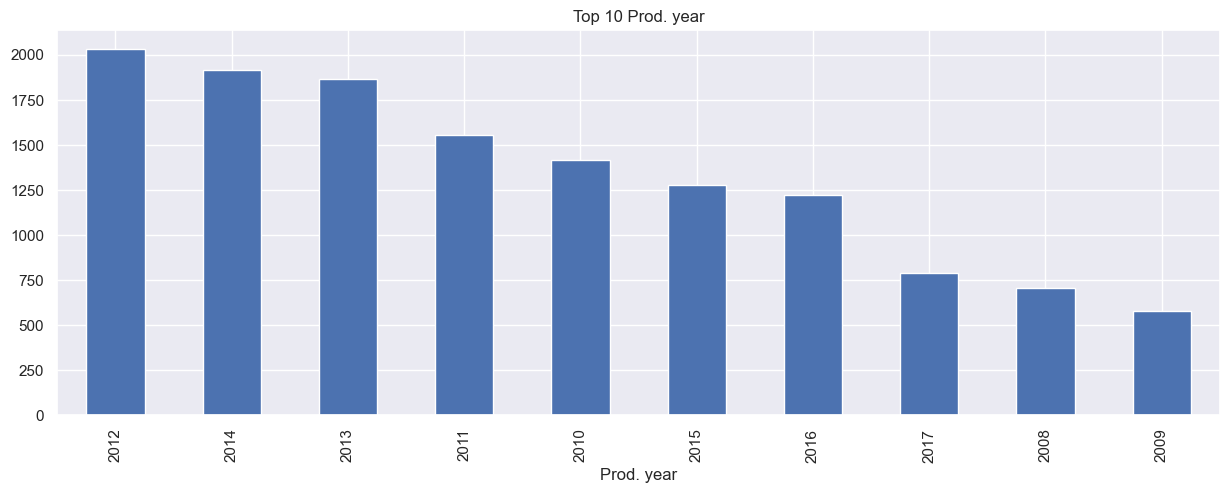

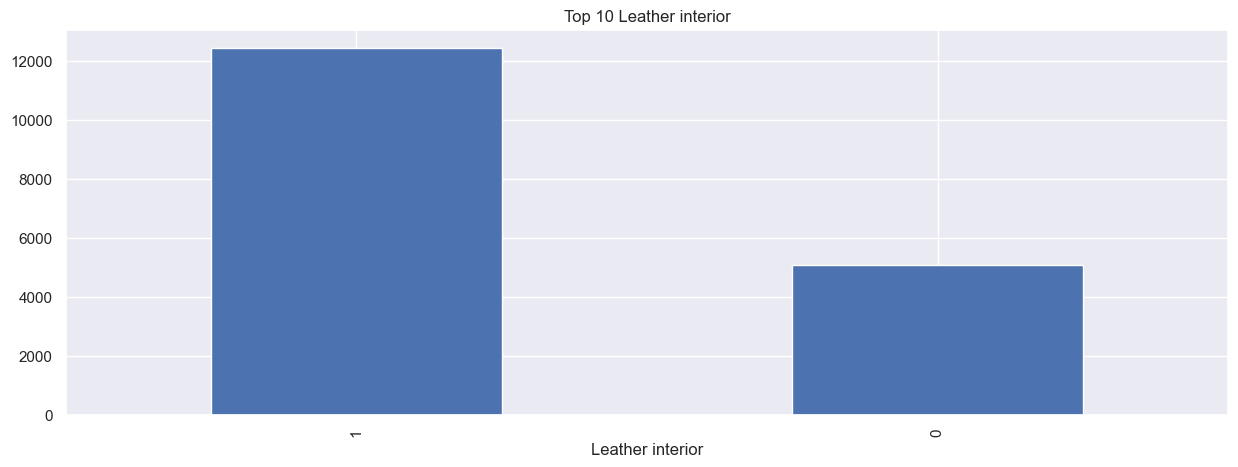

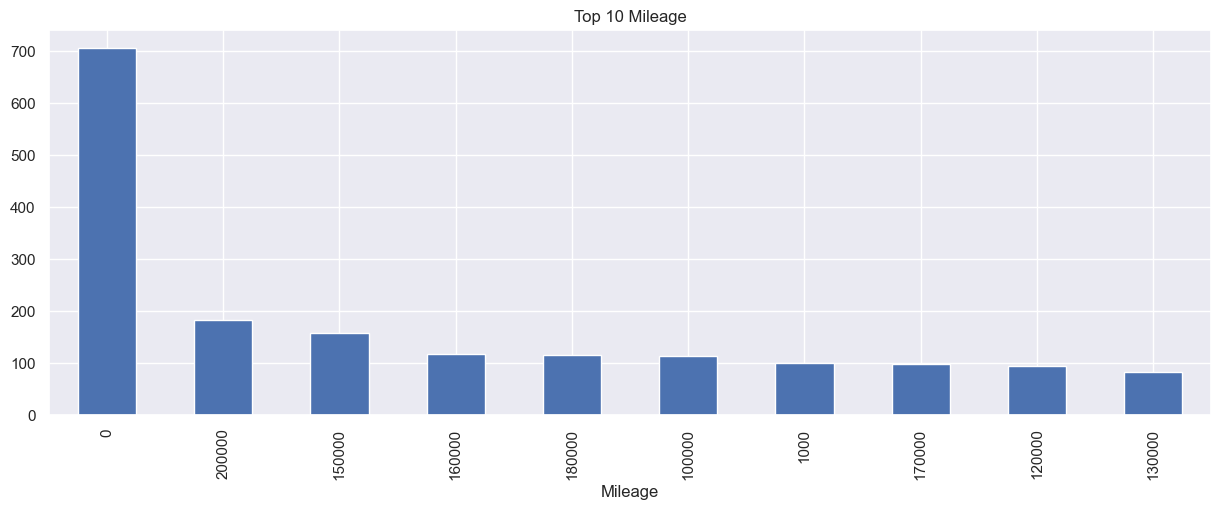

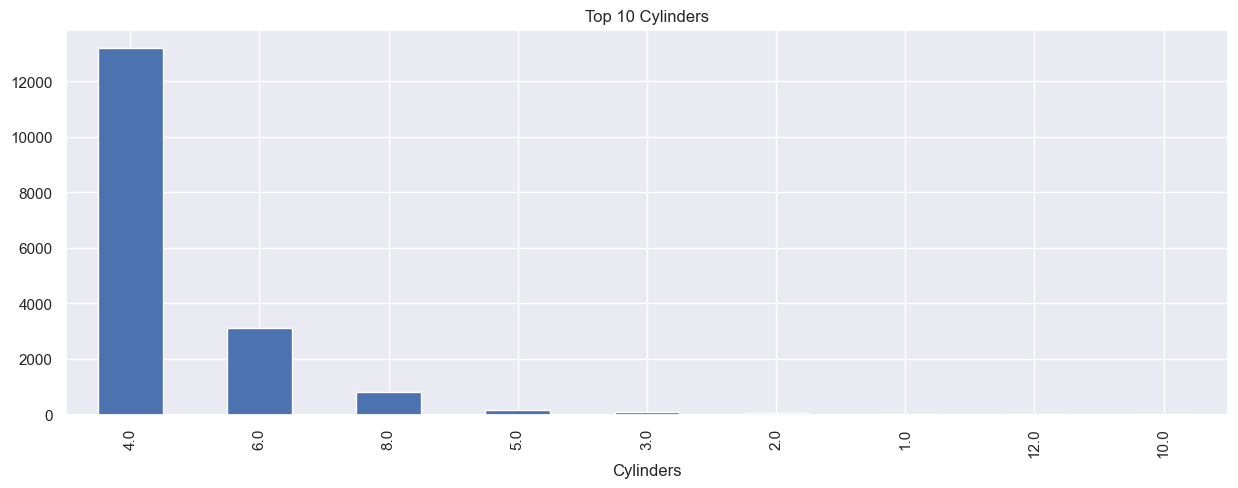

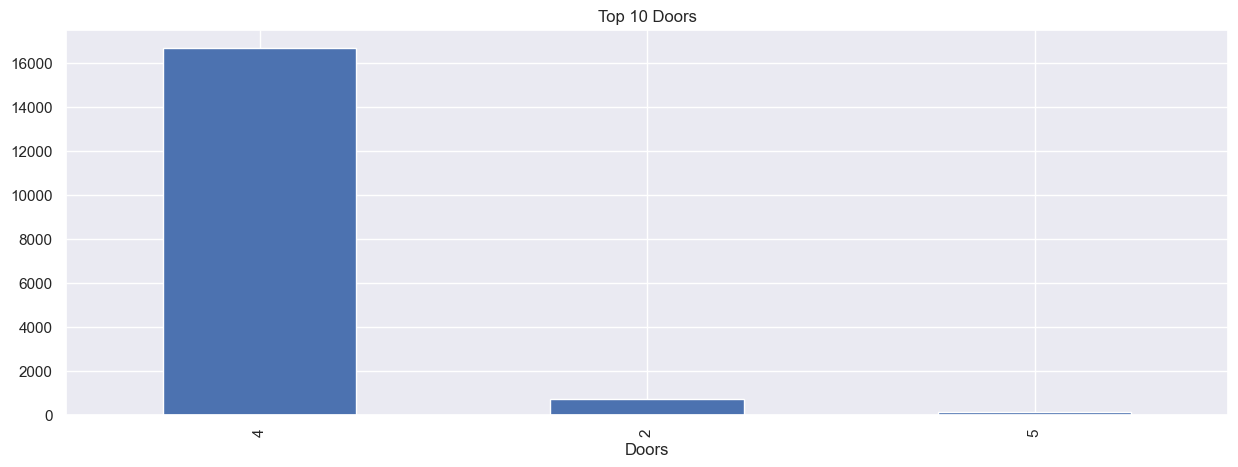

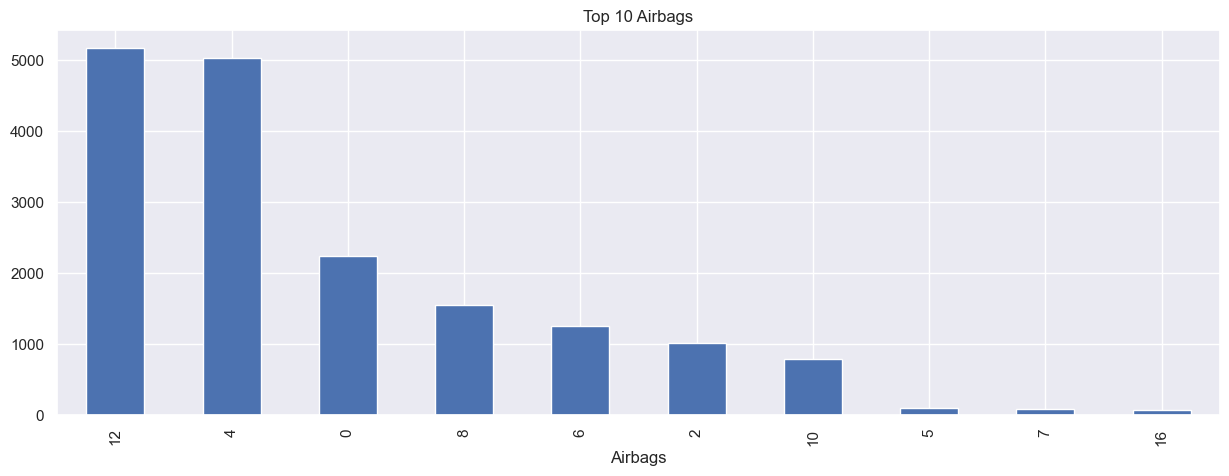

In [196]:
for col in attr: 
    plt.figure(figsize=(15,5))
    top10 = car_prep[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title("Top 10 " + col)
    plt.show()

### Looking for co-relations

In [198]:
car_prep

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,True
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,False
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,False
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,False


### Plotting the co-relations

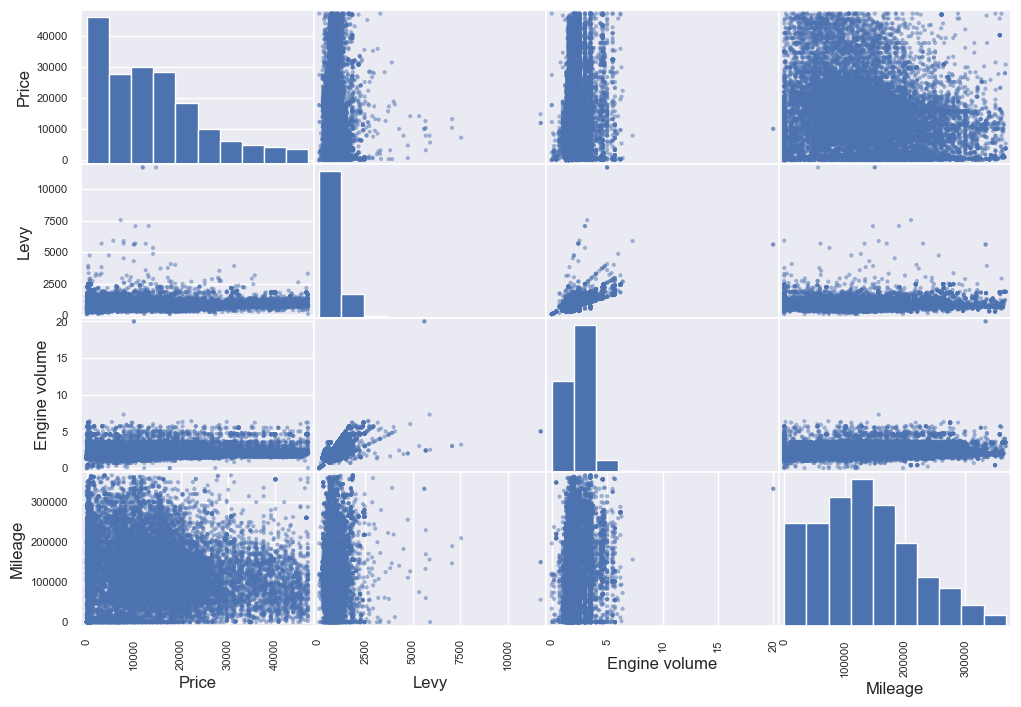

In [202]:
attr = ['Price', 'Levy', 'Engine volume', 'Mileage']
scatter_matrix(car_prep[attr], figsize=(12,8))
plt.show()

In [205]:
car_cat = car_prep.select_dtypes(include='object').columns.to_list()
for fe in car_cat:
    print(fe + ": ")
    print(car[fe].unique())

Manufacturer: 
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Model: 
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
Category: 
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Fuel type: 
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Gear box type: 
['Automatic' 'Tiptronic' 'Variator' 'Manual']
Drive wheels: 
['

# Data Pipeline

In [206]:
car_not_cat = car_prep.select_dtypes(exclude='object').columns.to_list()
car_not_cat.remove("Price")
car_not_cat

['Levy',
 'Prod. year',
 'Leather interior',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Doors',
 'Airbags',
 'Turbo']

***-> We will divde our category variable into two parts***

***-> One will be encoded with One hot encoding another part will be encoded with Target encoding***

***-> The reason is some categorical features have too many unique values,***

***-> So, if we do one hot encodin on that features there will be too many useless columns of 0***

***-> To solve this problem we used Target encoding***

In [207]:
# Features for target encoding
car_cat1 = ["Manufacturer", "Model", "Category", "Color"]
# Features for one hot encoding
car_cat2 = ["Fuel type", "Gear box type", "Drive wheels", "Wheel"]

In [212]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("std_scalar", StandardScaler())
])

In [213]:
full_pipeline = ColumnTransformer([
    ("target_encoder", TargetEncoder(), car_cat1),
    ('num', num_pipeline, car_not_cat),
    ("one_hot_encoder", OneHotEncoder(), car_cat2)
])

In [214]:
set_config(display="diagram")
full_pipeline

ColumnTransformer(transformers=[('target_encoder', TargetEncoder(),
                                 ['Manufacturer', 'Model', 'Category',
                                  'Color']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scalar',
                                                  StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Leather interior',
                                  'Engine volume', 'Mileage', 'Cylinders',
                                  'Doors', 'Airbags', 'Turbo']),
                                ('one_hot_encoder', OneHotEncoder(),
                                 ['Fuel type', 'Gear box type', 'Drive wheels',
                                  'Wheel'])])

In [215]:
car_prep[car_cat]

,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,CNG,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Diesel,Automatic,Front,Left wheel,Black


### Splitting Data into train test split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(car_prep.drop("Price", axis=1), car_prep["Price"], test_size=0.2, 
                                                    random_state = 1)

In [217]:
X_train["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'CNG', 'Plug-in Hybrid',
       'Hydrogen'], dtype=object)

In [247]:
X_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
9697,NaN,VOLKSWAGEN,Vento,2000,Sedan,0,Petrol,1.6,197346,4.0,Manual,Front,4,Left wheel,White,4,False
5036,781.0,HYUNDAI,H1,2012,Sedan,1,Diesel,2.5,82260,4.0,Automatic,Front,4,Left wheel,Black,4,False
12209,640.0,MITSUBISHI,Outlander sport,2013,Jeep,0,Petrol,2.0,72000,4.0,Tiptronic,4x4,4,Left wheel,Black,12,False
3494,891.0,HYUNDAI,Elantra,2016,Sedan,0,Petrol,2.0,67000,4.0,Tiptronic,Front,4,Left wheel,Black,12,False
12688,NaN,AUDI,A4,2006,Sedan,0,Petrol,2.0,225000,2.0,Automatic,4x4,4,Left wheel,Grey,6,False


### Select and train model

In [219]:
# function to show scores
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [220]:
# moodified X_train
X_train_mod = full_pipeline.fit_transform(X_train, y_train)

## Linear Regression

In [221]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_mod, y_train)

LinearRegression()

In [222]:
# lin_scores = cross_val_score(lin_reg, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
# display_scores(np.sqrt(-lin_scores))

Scores:  [8895.33589991 9105.31764705 8852.53508373 8553.94394377 8869.98749359
 9084.37132981 8657.01909329 8662.87402324 8564.04216521 8909.54399854]
Mean:  8815.497067812725
Standard deviation:  188.65261440245712


## Decision tree

In [223]:
# dec_tree = DecisionTreeRegressor()
# dec_tree.fit(X_train_mod, y_train)

DecisionTreeRegressor()

In [224]:
# tree_scores = cross_val_score(dec_tree, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
# display_scores(np.sqrt(-tree_scores))

Scores:  [7546.97114909 7853.76329441 7893.64090508 7076.35917226 7814.58106379
 7390.33913216 7355.71242078 7209.96943248 7332.56226262 7469.22169297]
Mean:  7494.312052562915
Standard deviation:  265.77472232396366


## Random forest

In [225]:
forest = RandomForestRegressor()
forest.fit(X_train_mod, y_train)

RandomForestRegressor()

In [226]:
forest_scores = cross_val_score(forest, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-forest_scores))

Scores:  [5490.00295139 5847.5857254  5562.60744426 5221.86308858 5889.08619346
 5674.40117425 5228.69001885 5371.56928612 5517.61865142 5477.57713489]
Mean:  5528.100166862244
Standard deviation:  216.1064572590502


## Support vector regressor

In [227]:
# svr = SVR()
# svr.fit(X_train_mod, y_train)

SVR()

In [228]:
# svr_scores = cross_val_score(svr, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
# display_scores(np.sqrt(-svr_scores))

Scores:  [11441.81009136 11584.20797821 11100.86053141 11433.877323
 11858.52733002 11334.47896931 11182.43664806 11301.04666423
 11095.51641623 11534.64561672]
Mean:  11386.740756856087
Standard deviation:  225.179987977709


# Fine tune model

In [230]:
param_grid = [
    {"n_estimators": [30, 100], "max_features": [8, 20]},
    {"bootstrap": [False], "n_estimators": [30, 100], "max_features": [8, 20]}
]

In [231]:
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [232]:
grid_search.fit(X_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 20], 'n_estimators': [30, 100]},
                         {'bootstrap': [False], 'max_features': [8, 20],
                          'n_estimators': [30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [233]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 100}

In [234]:
car_ml_model = grid_search.best_estimator_

In [235]:
car_ml_model

RandomForestRegressor(bootstrap=False, max_features=8)

# Testing model

In [236]:
y_pred = car_ml_model.predict(full_pipeline.transform(X_test))

In [238]:
final_mse = mean_squared_error(y_test, y_pred)
final_mse

33273936.99178334

In [239]:
final_rmse = np.sqrt(final_mse)
final_rmse

5768.356524330248

In [240]:
r2_score(y_test, y_pred)

0.7460693967819476

*Over fitting :(*

-> reason may be for target encoding,

-> target encoding have con of overfitting

# Visualizing model's prediction

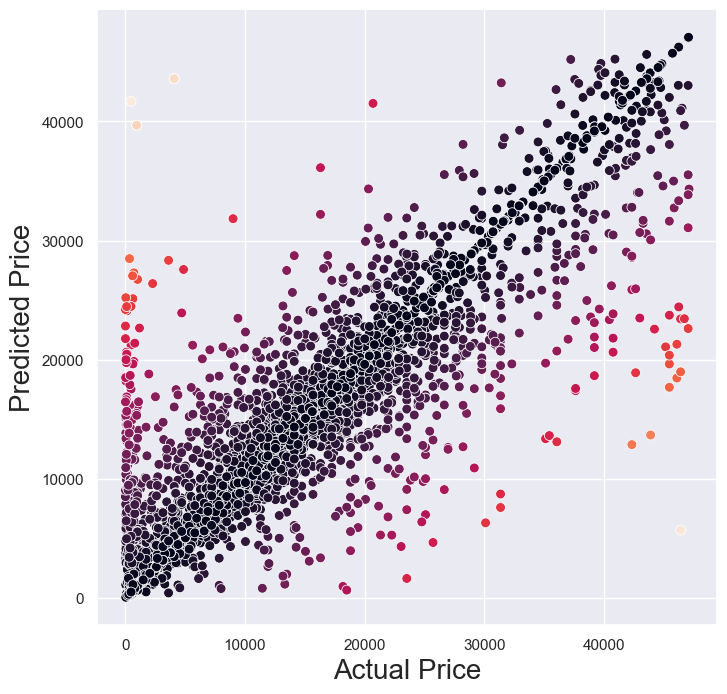

In [241]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, c=abs(y_test - y_pred), s=50) 
plt.xlabel("Actual Price", fontsize=20)
plt.ylabel("Predicted Price", fontsize=20)
plt.show()

# Confidence

In [243]:
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
con_res = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))
print(f"Model is 95% confident that its error will be in between {con_res}")

Model is 95% confident that its error will be in between [5433.13685041 6085.13746338]


##########################
# SAVE-LOAD using pickle #
##########################

In [244]:

import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(car_ml_model,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

# clf2.predict(X[0:1])

In [248]:
predictions = clf2.predict(full_pipeline.transform(X_test))

In [249]:
predictions

array([24123.        , 30567.07      , 14164.66666667, ...,
        1490.        , 22894.        ,  4170.96      ])

In [303]:
row = X_test.iloc[3]
new_df = pd.DataFrame(row).transpose()
new_df


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2427,919.0,BMW,740,2012,Sedan,1,Petrol,3.0,199536,6.0,Automatic,Rear,4,Left wheel,Silver,12,False


In [291]:
predictions = clf2.predict(full_pipeline.transform(new_df))
predictions

array([5844.84])

In [301]:
y_test

6559     15423
5861     43548
2368     21012
2427      5175
10185      627
         ...  
2078     15624
4217       470
18900     1490
17363    22894
10870      392
Name: Price, Length: 3506, dtype: int64